<a href="https://colab.research.google.com/github/DineshSiddhartha/SAI_A6/blob/main/SAI_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autogluon -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.0/430.0 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [48]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




________________________________________________________________________________

##1. Implement a Multi-Layer Perceptron (MLP) Using the Iris Dataset


In [56]:
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)

In [57]:
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y)


In [58]:
X[:5], y_one_hot[:5]


(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]))

In [59]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)


In [60]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Displaying the shapes of the splits
X_train.shape, X_val.shape, X_test.shape


((105, 4), (15, 4), (30, 4))

________________________________________________________________________________

##2. Define and Train the MLP Model


In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [62]:
model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Display model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Compiling the model
learning_rate = 0.001
batch_size = 32
epochs = 50
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)
# Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.3430 - loss: 1.1826 - val_accuracy: 0.1333 - val_loss: 1.3388
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3805 - loss: 1.1893 - val_accuracy: 0.1333 - val_loss: 1.3257
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3805 - loss: 1.1762 - val_accuracy: 0.1333 - val_loss: 1.3105
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3764 - loss: 1.1435 - val_accuracy: 0.1333 - val_loss: 1.2947
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3066 - loss: 1.1892 - val_accuracy: 0.1333 - val_loss: 1.2778
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3149 - loss: 1.1562 - val_accuracy: 0.1333 - val_loss: 1.2624
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3493 - loss: 1.1360 - val_accuracy: 0.1333 - val_loss: 1.2490
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3566 - loss: 1.1186 - val_accuracy: 0.1333 - val_loss: 1.2353

In [49]:
# Track and store training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']


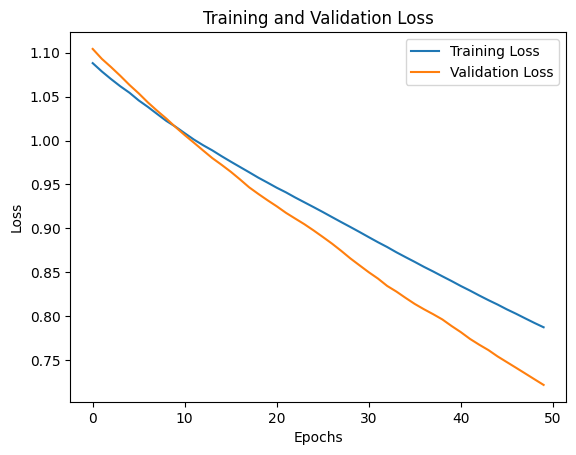

In [13]:
# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


________________________________________________________________________________

##3. Evaluate Model Performance

In [64]:
# Evaluating the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [15]:
# Computing metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.6333
Precision: 0.4630
Recall: 0.6667
F1-score: 0.5200


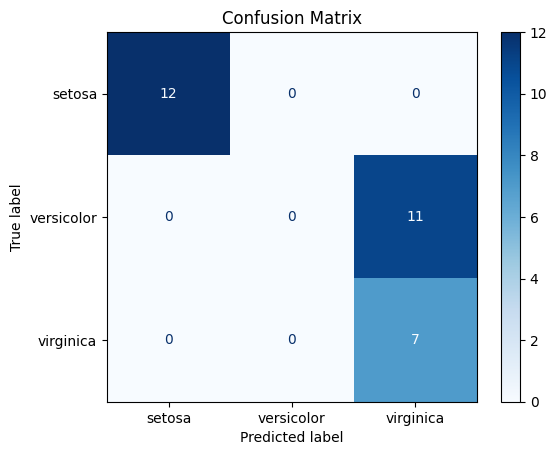

In [17]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


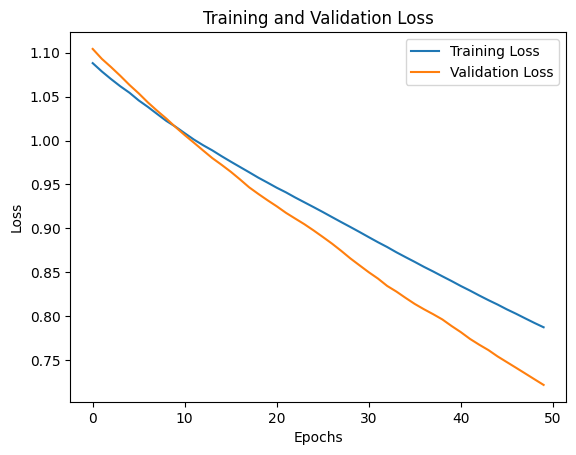

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


________________________________________________________________________________

##4. Set Up Experiment Tracking with Weights & Biases (W&B)

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 23110168 (23110168-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


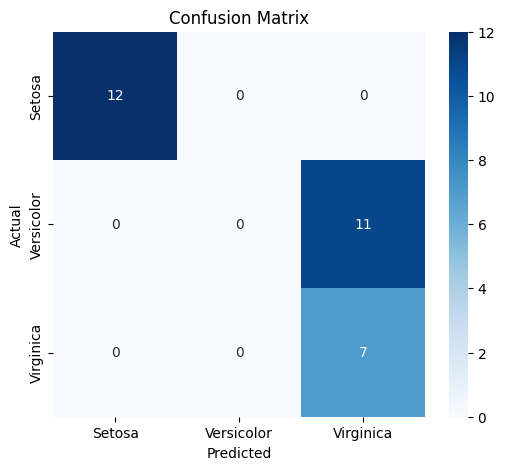

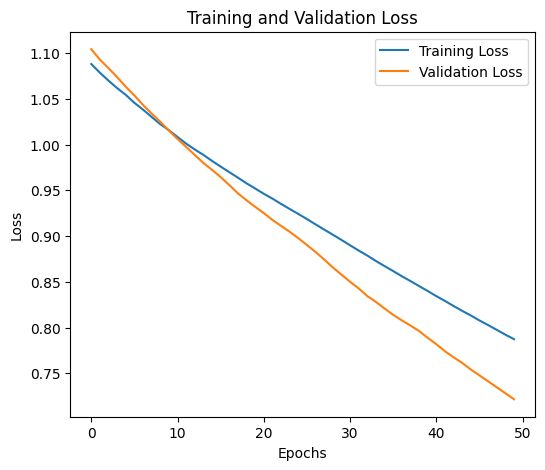

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
test_accuracy,▁
test_f1_score,▁
test_precision,▁
test_recall,▁
training_loss,███▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
validation_loss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
epoch,50
test_accuracy,0.63333
test_f1_score,0.53067
test_precision,0.49074


In [19]:
import wandb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Initialize W&B run
wandb.init(project="mlp-iris-experiment", name="MLP_Iris_Tracking")

val_loss=history.history['val_loss']
training_loss=history.history['loss']

# Log model architecture
config = {
    "Number of layers":3,
    "architecture": "MLP",
    "input_neurons": 4,
    "hidden_neurons": 16,
    "output_neurons": 3,
    "activation_hidden": "ReLU",
    "activation_output": "Softmax",
    "loss_function": "Categorical Crossentropy",
    "optimizer": "Adam",
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 50,
}
wandb.config.update(config)

# Log training and validation loss per epoch
for epoch in range(len(history.history['loss'])):
    wandb.log({
        "epoch": epoch + 1,
        "training_loss": history.history['loss'][epoch],
        "validation_loss": history.history['val_loss'][epoch]
        })
wandb.log({"Validation Loss": val_loss})
wandb.log({"Training Loss": training_loss})

# Evaluate model performance on test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average="weighted")
recall = recall_score(y_test_classes, y_pred_classes, average="weighted")
f1 = f1_score(y_test_classes, y_pred_classes, average="weighted")
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Log final evaluation metrics
wandb.log({
    "test_accuracy": accuracy,
    "test_precision": precision,
    "test_recall": recall,
    "test_f1_score": f1
})

# Plot and log confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
wandb.log({"Confusion Matrix": wandb.Image(plt)})
plt.show()

# Plot and log loss curves
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
wandb.log({"Loss Curve": wandb.Image(plt)})
plt.show()

# Finish the W&B run
wandb.finish()


Screenshots of the W&B dashboard displaying:
Model architecture.
Hyperparameters.
Logged metrics.
Final evaluation results.
Confusion matrix visualization.
Training and validation loss curves.


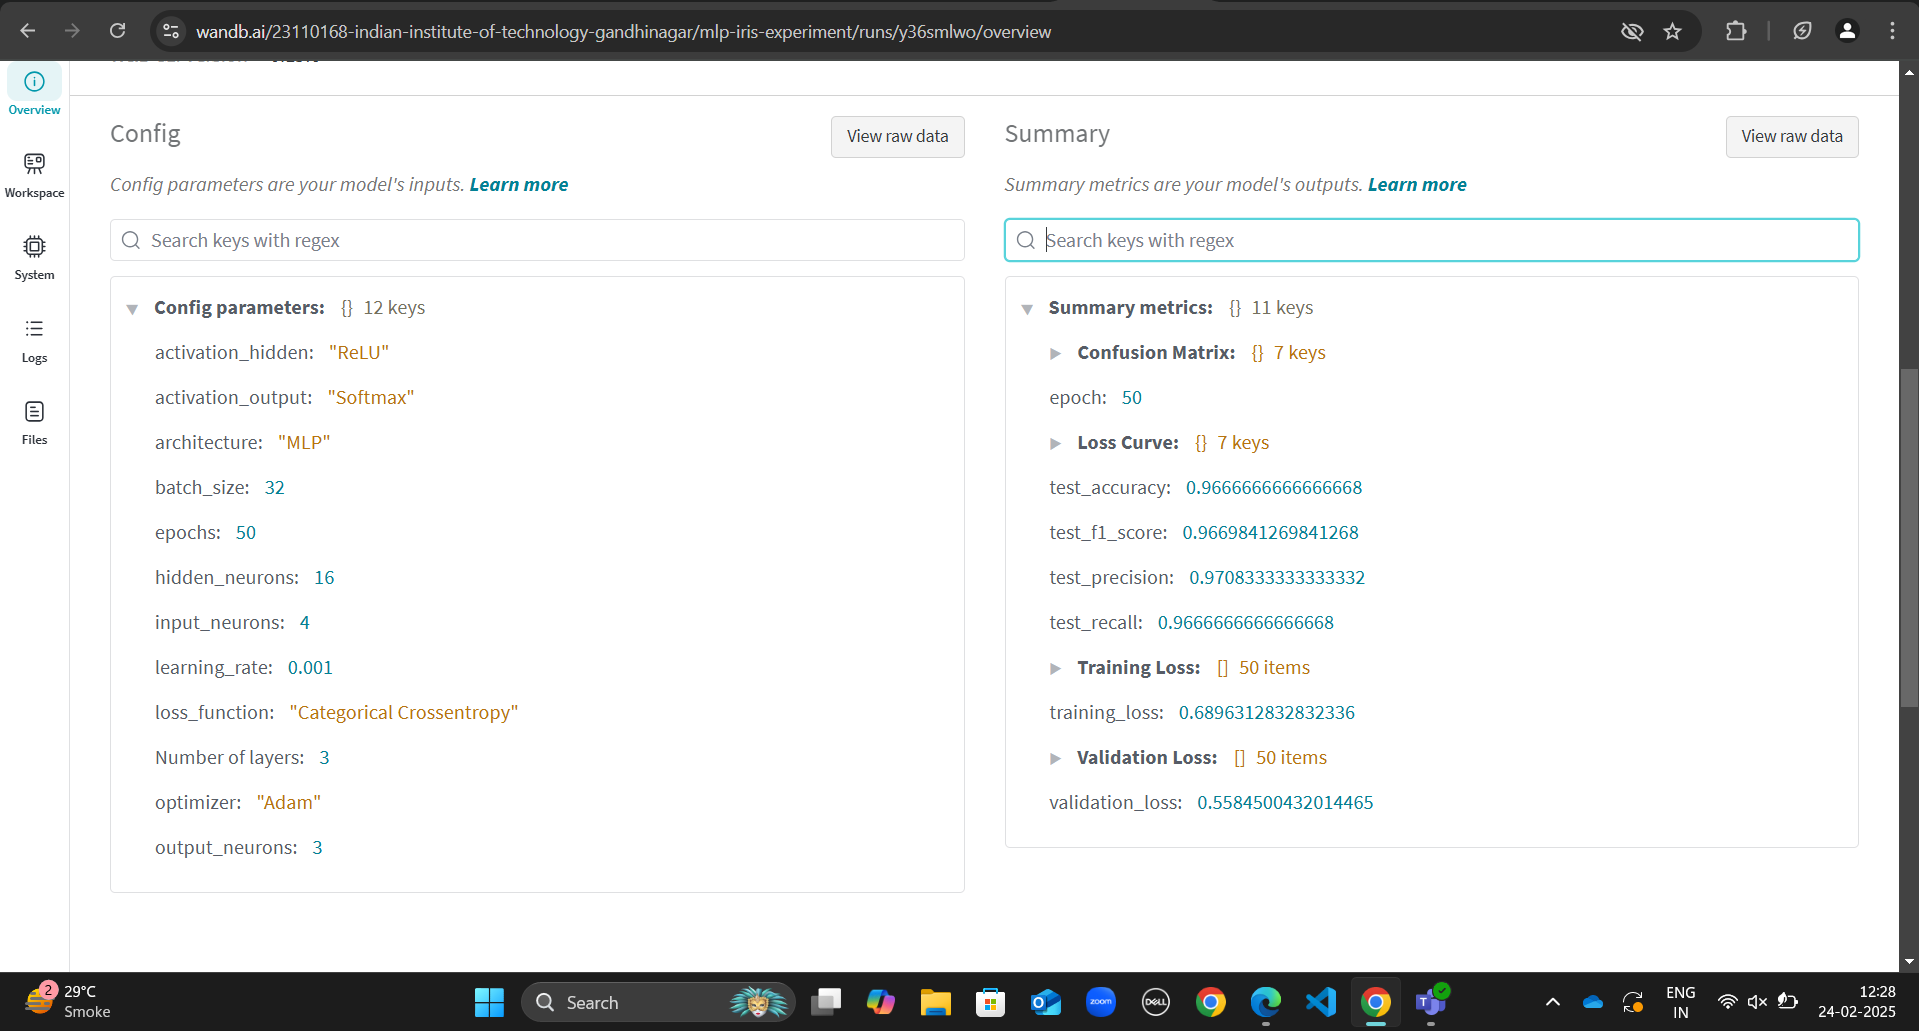


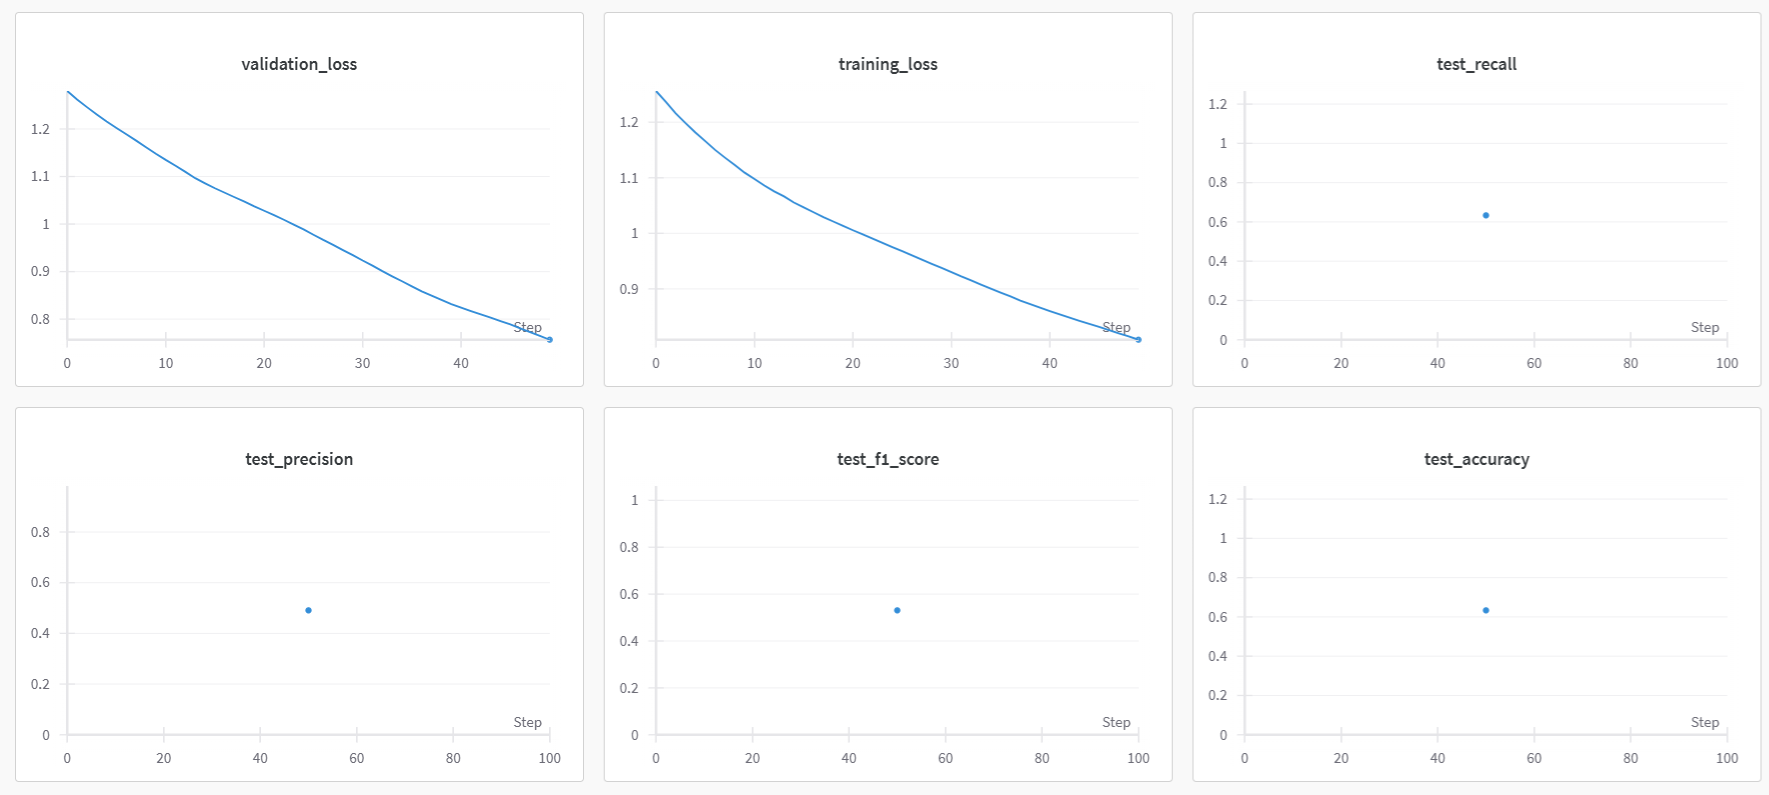

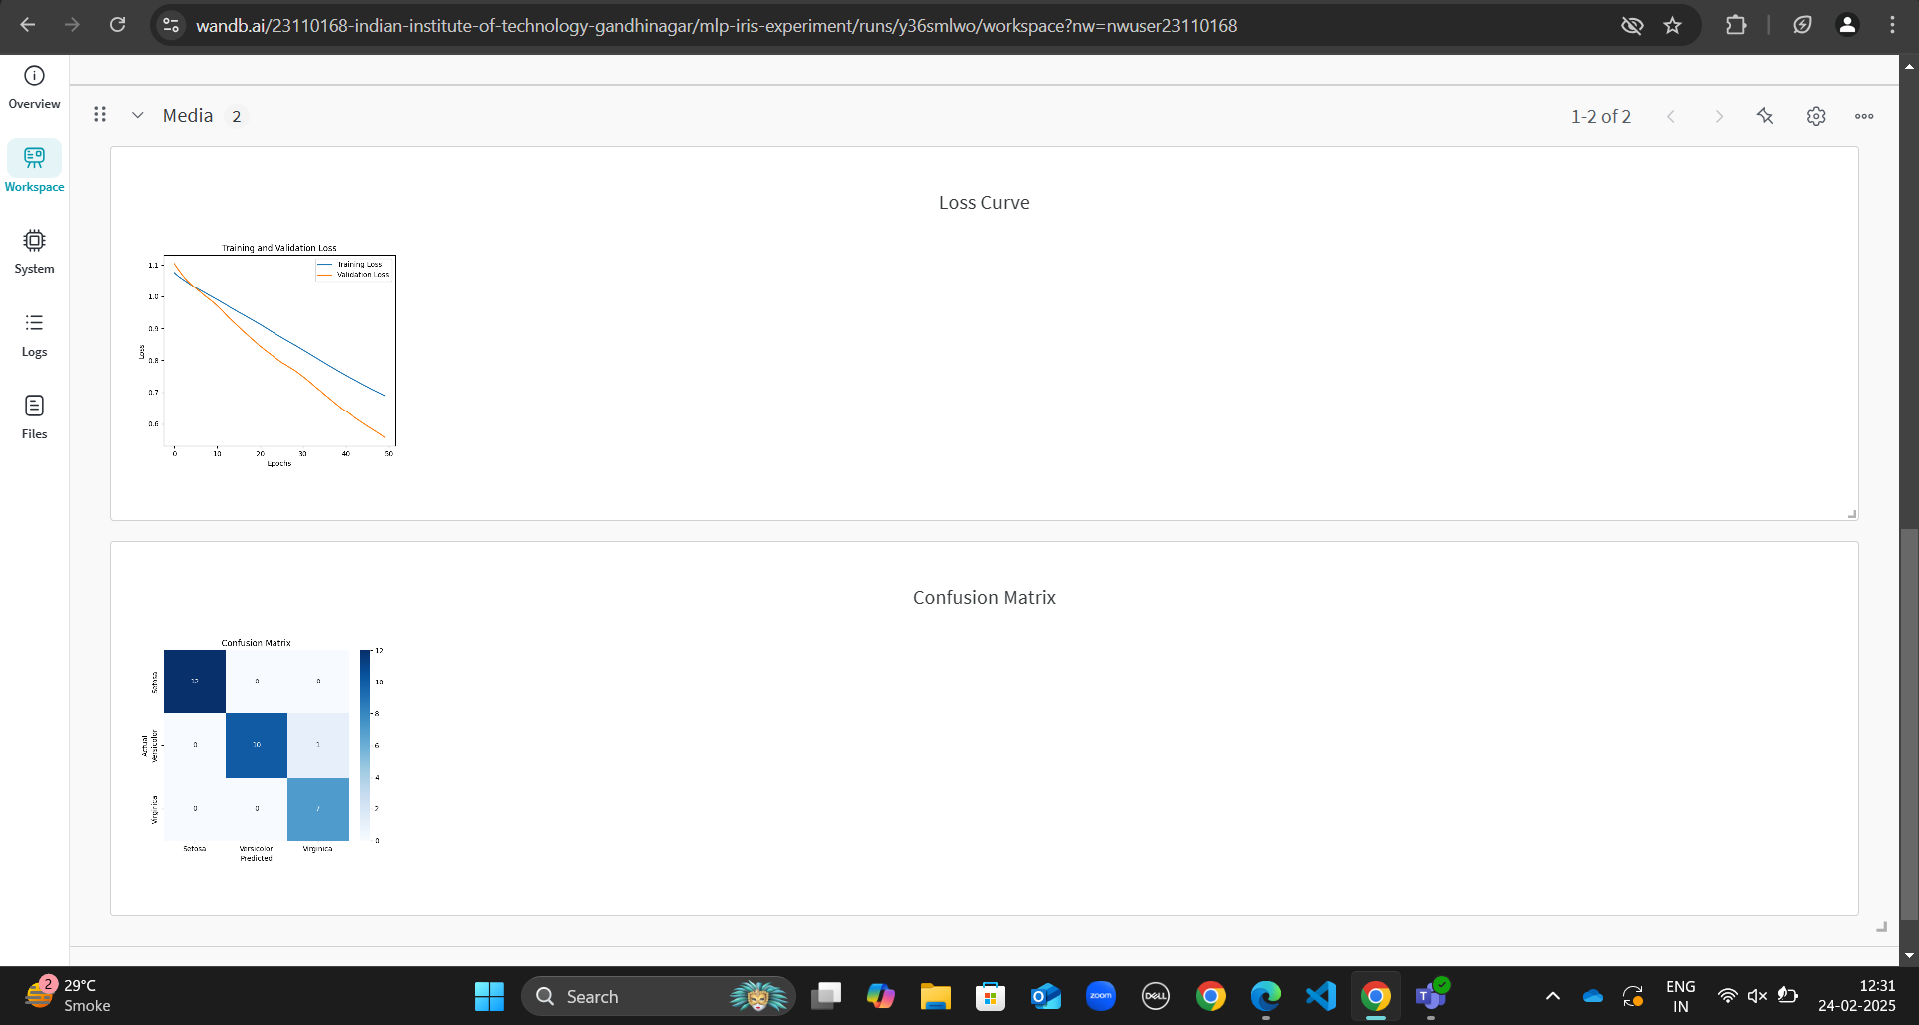

_______________________________________________________

##Section 2: Hyperparameters
#Task 1: Hyperparameter Optimization


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 395 (1.55 KB)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264 (1.04 KB)

In [21]:
# Function to train and evaluate the model
def train_and_evaluate(batch_size, learning_rate, epochs,model):
    print(f"Training with batch size={batch_size}, learning rate={learning_rate}, epochs={epochs}")

    model = model

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs,
        verbose=1
    )

    # Evaluate the model on test data
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Compute metrics
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='macro')
    recall = recall_score(y_test_classes, y_pred_classes, average='macro')
    f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

    # Log results
    log_data = {
        'Batch Size': batch_size,
        'Learning Rate': learning_rate,
        'Epochs': epochs,
        'Training Loss': history.history['loss'],
        'Validation Loss': history.history['val_loss'],
        'Evaluation Metrics': {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        },
        'Confusion Matrix': conf_matrix.tolist()
    }

    # Plot training and validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss Curve: batch={batch_size}, lr={learning_rate}, epochs={epochs}')
    plt.show()

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: batch={batch_size}, lr={learning_rate}, epochs={epochs}')
    plt.show()

    # Showing inputs, predictions, and truth values for five test samples
    print("Sample Predictions:")
    for i in range(5):
        print(f"Input: {X_test[i]}")
        print(f"Predicted: {iris.target_names[y_pred_classes[i]]}")
        print(f"Truth: {iris.target_names[y_test_classes[i]]}\n")

    return log_data

Training with batch size=2, learning rate=0.001, epochs=1
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6644 - loss: 0.7624 - val_accuracy: 0.8667 - val_loss: 0.6536
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


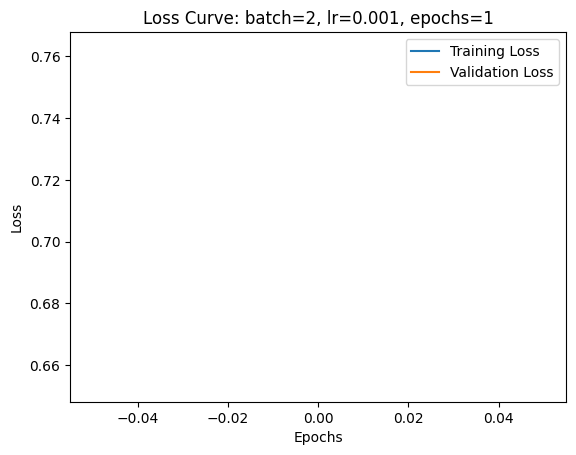

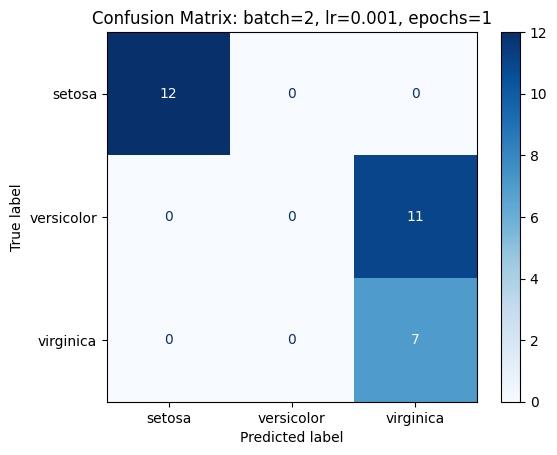

Sample Predictions:
Input: [0.26470588 0.95454545 0.07142857 0.        ]
Predicted: setosa
Truth: setosa

Input: [0.70588235 0.45454545 0.73214286 0.91666667]
Predicted: virginica
Truth: virginica

Input: [0.70588235 0.22727273 0.83928571 0.70833333]
Predicted: virginica
Truth: virginica

Input: [0.32352941 0.86363636 0.03571429 0.125     ]
Predicted: setosa
Truth: setosa

Input: [0.58823529 0.22727273 0.69642857 0.75      ]
Predicted: virginica
Truth: virginica

Training with batch size=2, learning rate=0.001, epochs=3
Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6204 - loss: 0.7306 - val_accuracy: 0.8667 - val_loss: 0.5867
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6385 - loss: 0.6895 - val_accuracy: 0.8667 - val_loss: 0.5510
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6189 - loss: 0.6605 - val_accuracy: 0.8667 - val_loss: 0.5138
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


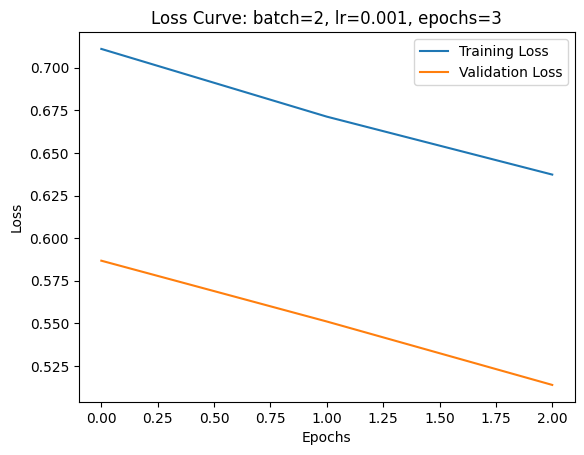

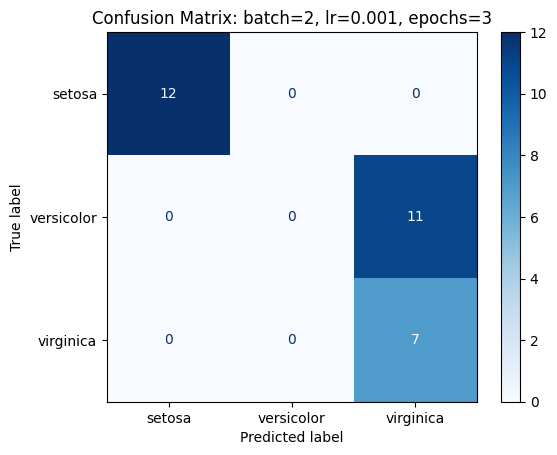

Sample Predictions:
Input: [0.26470588 0.95454545 0.07142857 0.        ]
Predicted: setosa
Truth: setosa

Input: [0.70588235 0.45454545 0.73214286 0.91666667]
Predicted: virginica
Truth: virginica

Input: [0.70588235 0.22727273 0.83928571 0.70833333]
Predicted: virginica
Truth: virginica

Input: [0.32352941 0.86363636 0.03571429 0.125     ]
Predicted: setosa
Truth: setosa

Input: [0.58823529 0.22727273 0.69642857 0.75      ]
Predicted: virginica
Truth: virginica

Training with batch size=2, learning rate=0.001, epochs=5
Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6517 - loss: 0.6063 - val_accuracy: 0.8667 - val_loss: 0.4788
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6832 - loss: 0.5870 - val_accuracy: 0.8667 - val_loss: 0.4513
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7377 - loss: 0.5532 - val_accuracy: 0.8667 - val_loss: 0.4321
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6782 - loss: 0.5570 - val_accuracy: 

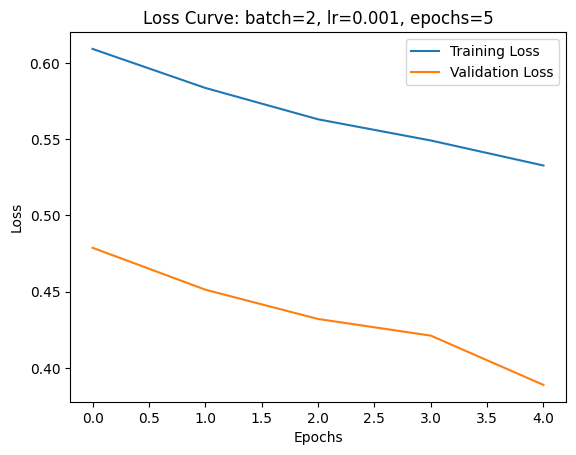

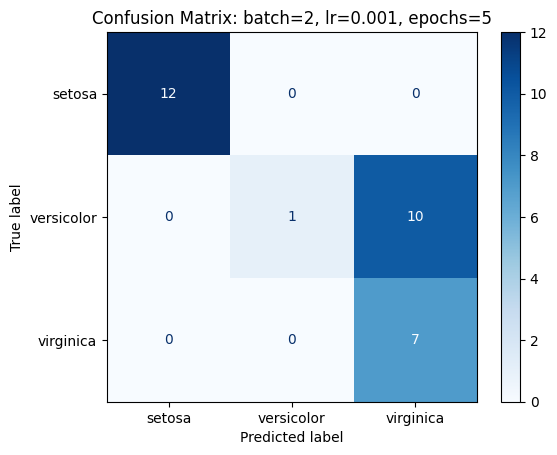

Sample Predictions:
Input: [0.26470588 0.95454545 0.07142857 0.        ]
Predicted: setosa
Truth: setosa

Input: [0.70588235 0.45454545 0.73214286 0.91666667]
Predicted: virginica
Truth: virginica

Input: [0.70588235 0.22727273 0.83928571 0.70833333]
Predicted: virginica
Truth: virginica

Input: [0.32352941 0.86363636 0.03571429 0.125     ]
Predicted: setosa
Truth: setosa

Input: [0.58823529 0.22727273 0.69642857 0.75      ]
Predicted: virginica
Truth: virginica

Training with batch size=2, learning rate=1e-05, epochs=1
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7116 - loss: 0.5590 - val_accuracy: 0.8667 - val_loss: 0.3837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


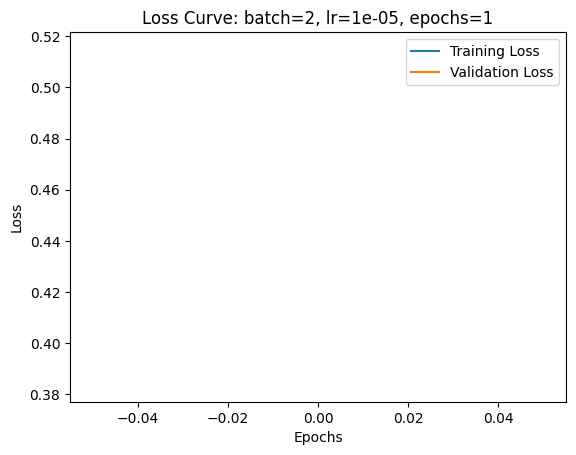

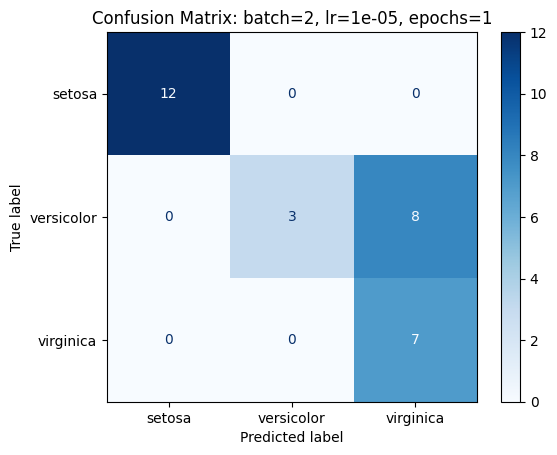

Sample Predictions:
Input: [0.26470588 0.95454545 0.07142857 0.        ]
Predicted: setosa
Truth: setosa

Input: [0.70588235 0.45454545 0.73214286 0.91666667]
Predicted: virginica
Truth: virginica

Input: [0.70588235 0.22727273 0.83928571 0.70833333]
Predicted: virginica
Truth: virginica

Input: [0.32352941 0.86363636 0.03571429 0.125     ]
Predicted: setosa
Truth: setosa

Input: [0.58823529 0.22727273 0.69642857 0.75      ]
Predicted: virginica
Truth: virginica

Training with batch size=2, learning rate=1e-05, epochs=3
Epoch 1/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7340 - loss: 0.5751 - val_accuracy: 0.8667 - val_loss: 0.3684
Epoch 2/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7508 - loss: 0.5094 - val_accuracy: 0.8667 - val_loss: 0.3524
Epoch 3/3
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7751 - loss: 0.4586 - val_accuracy: 0.8667 - val_loss: 0.3424
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


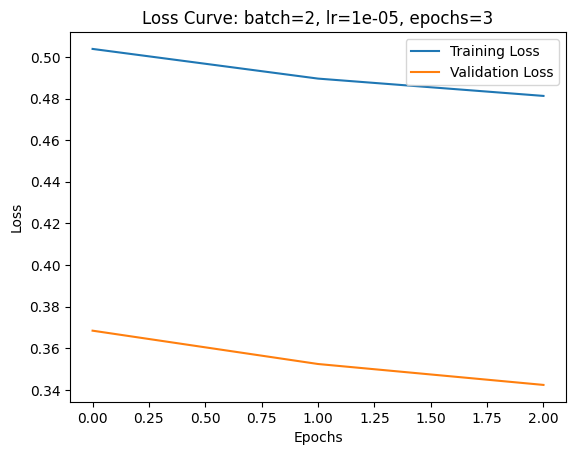

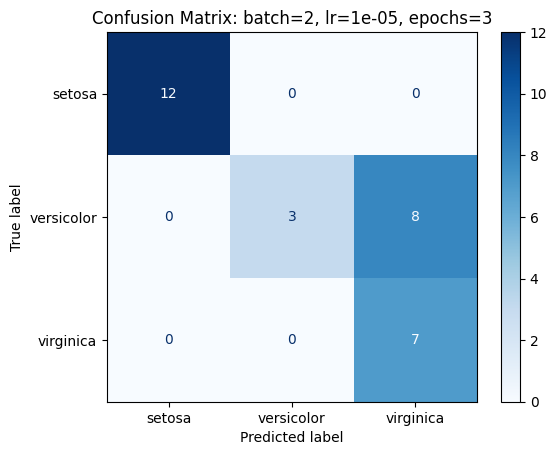

Sample Predictions:
Input: [0.26470588 0.95454545 0.07142857 0.        ]
Predicted: setosa
Truth: setosa

Input: [0.70588235 0.45454545 0.73214286 0.91666667]
Predicted: virginica
Truth: virginica

Input: [0.70588235 0.22727273 0.83928571 0.70833333]
Predicted: virginica
Truth: virginica

Input: [0.32352941 0.86363636 0.03571429 0.125     ]
Predicted: setosa
Truth: setosa

Input: [0.58823529 0.22727273 0.69642857 0.75      ]
Predicted: virginica
Truth: virginica

Training with batch size=2, learning rate=1e-05, epochs=5
Epoch 1/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8043 - loss: 0.4673 - val_accuracy: 0.8667 - val_loss: 0.3366
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8309 - loss: 0.4244 - val_accuracy: 0.9333 - val_loss: 0.3340
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8600 - loss: 0.4856 - val_accuracy: 1.0000 - val_loss: 0.3318
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8683 - loss: 0.4522 - val_accuracy: 

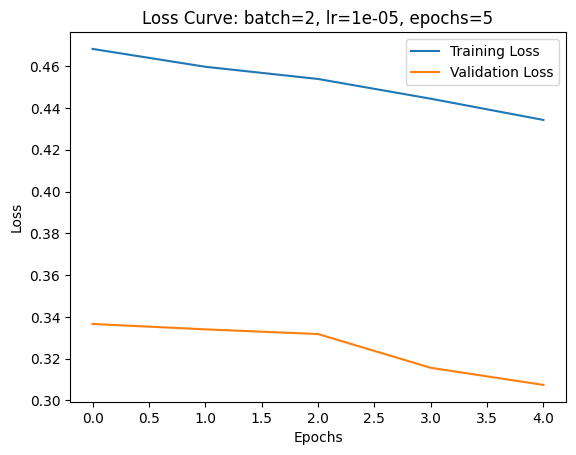

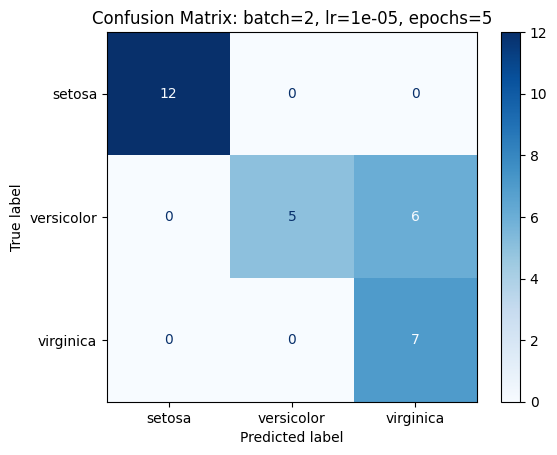

Sample Predictions:
Input: [0.26470588 0.95454545 0.07142857 0.        ]
Predicted: setosa
Truth: setosa

Input: [0.70588235 0.45454545 0.73214286 0.91666667]
Predicted: virginica
Truth: virginica

Input: [0.70588235 0.22727273 0.83928571 0.70833333]
Predicted: virginica
Truth: virginica

Input: [0.32352941 0.86363636 0.03571429 0.125     ]
Predicted: setosa
Truth: setosa

Input: [0.58823529 0.22727273 0.69642857 0.75      ]
Predicted: virginica
Truth: virginica

Training with batch size=4, learning rate=0.001, epochs=1
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8425 - loss: 0.4383 - val_accuracy: 1.0000 - val_loss: 0.3064
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


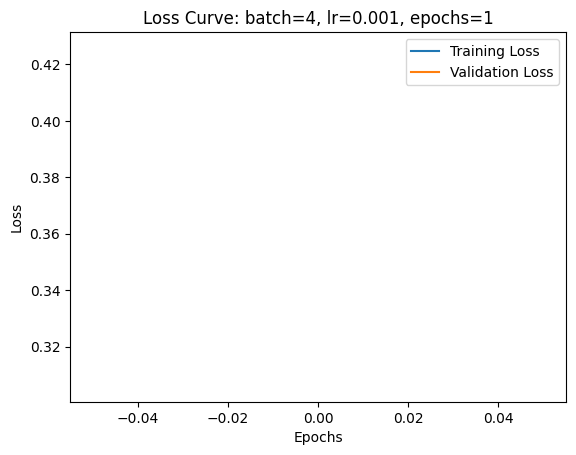

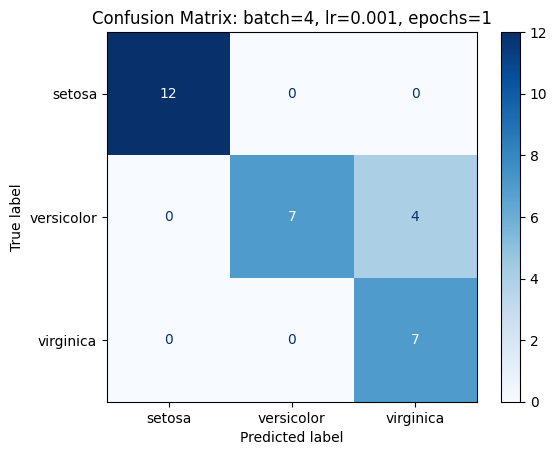

Sample Predictions:
Input: [0.26470588 0.95454545 0.07142857 0.        ]
Predicted: setosa
Truth: setosa

Input: [0.70588235 0.45454545 0.73214286 0.91666667]
Predicted: virginica
Truth: virginica

Input: [0.70588235 0.22727273 0.83928571 0.70833333]
Predicted: virginica
Truth: virginica

Input: [0.32352941 0.86363636 0.03571429 0.125     ]
Predicted: setosa
Truth: setosa

Input: [0.58823529 0.22727273 0.69642857 0.75      ]
Predicted: virginica
Truth: virginica

Training with batch size=4, learning rate=0.001, epochs=3
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9195 - loss: 0.4307 - val_accuracy: 1.0000 - val_loss: 0.3057
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9052 - loss: 0.4143 - val_accuracy: 1.0000 - val_loss: 0.2964
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9121 - loss: 0.4307 - val_accuracy: 1.0000 - val_loss: 0.2969
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


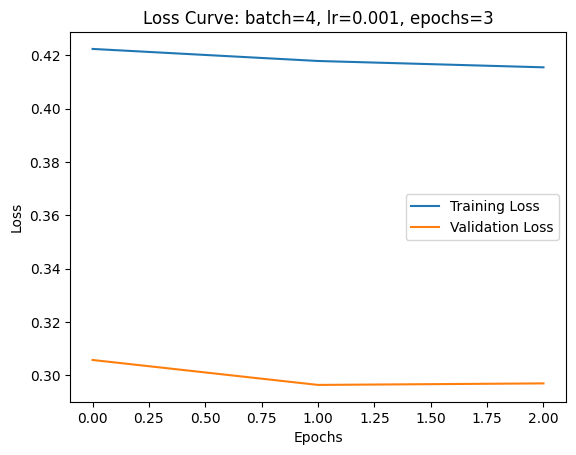

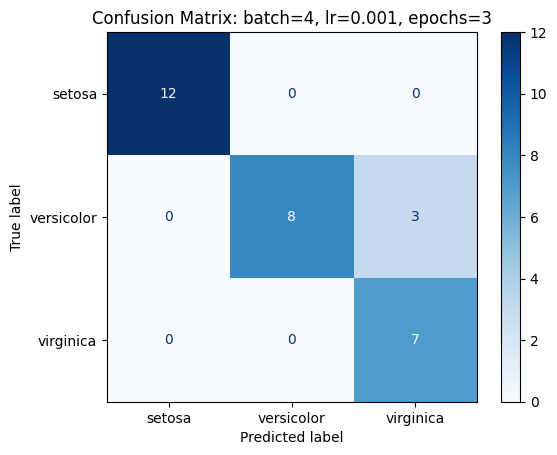

Sample Predictions:
Input: [0.26470588 0.95454545 0.07142857 0.        ]
Predicted: setosa
Truth: setosa

Input: [0.70588235 0.45454545 0.73214286 0.91666667]
Predicted: virginica
Truth: virginica

Input: [0.70588235 0.22727273 0.83928571 0.70833333]
Predicted: virginica
Truth: virginica

Input: [0.32352941 0.86363636 0.03571429 0.125     ]
Predicted: setosa
Truth: setosa

Input: [0.58823529 0.22727273 0.69642857 0.75      ]
Predicted: virginica
Truth: virginica

Training with batch size=4, learning rate=0.001, epochs=5
Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9088 - loss: 0.4116 - val_accuracy: 1.0000 - val_loss: 0.2892
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8917 - loss: 0.3925 - val_accuracy: 1.0000 - val_loss: 0.2839
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8805 - loss: 0.4210 - val_accuracy: 1.0000 - val_loss: 0.2910
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9249 - loss: 0.3809 - val_accuracy: 

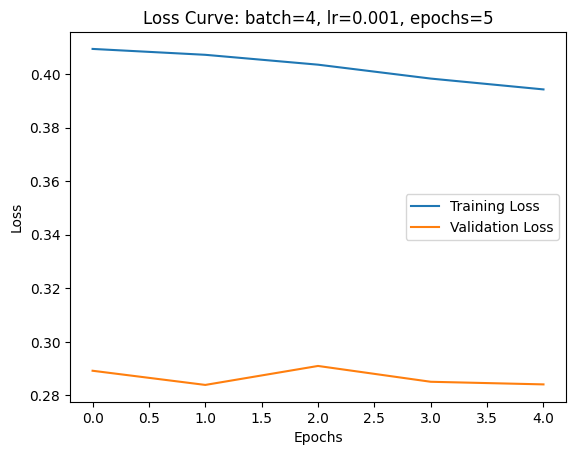

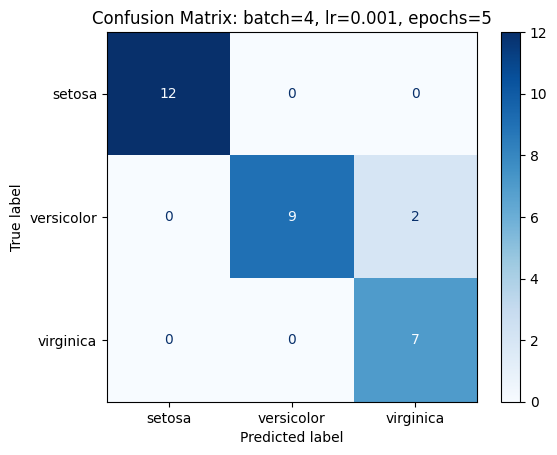

Sample Predictions:
Input: [0.26470588 0.95454545 0.07142857 0.        ]
Predicted: setosa
Truth: setosa

Input: [0.70588235 0.45454545 0.73214286 0.91666667]
Predicted: virginica
Truth: virginica

Input: [0.70588235 0.22727273 0.83928571 0.70833333]
Predicted: virginica
Truth: virginica

Input: [0.32352941 0.86363636 0.03571429 0.125     ]
Predicted: setosa
Truth: setosa

Input: [0.58823529 0.22727273 0.69642857 0.75      ]
Predicted: virginica
Truth: virginica

Training with batch size=4, learning rate=1e-05, epochs=1
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9481 - loss: 0.3954 - val_accuracy: 1.0000 - val_loss: 0.2822
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


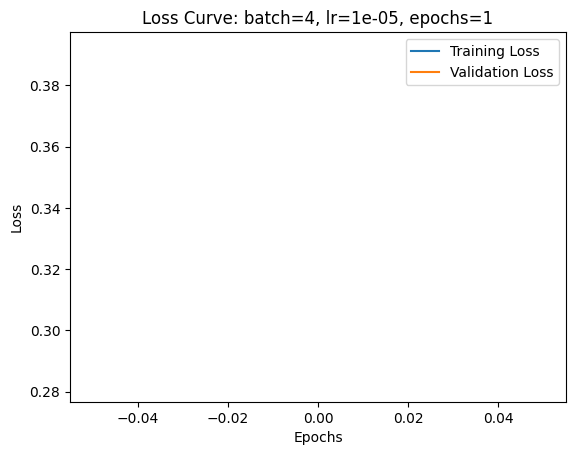

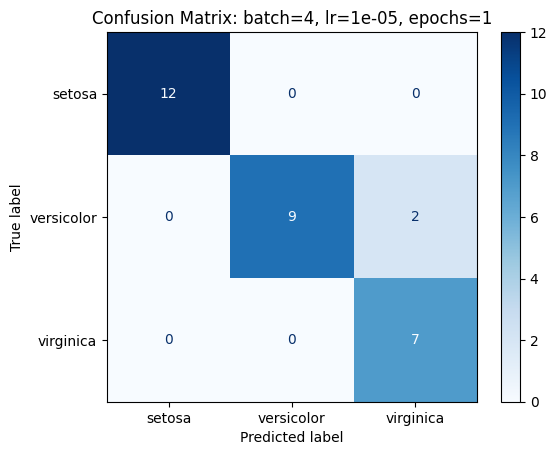

Sample Predictions:
Input: [0.26470588 0.95454545 0.07142857 0.        ]
Predicted: setosa
Truth: setosa

Input: [0.70588235 0.45454545 0.73214286 0.91666667]
Predicted: virginica
Truth: virginica

Input: [0.70588235 0.22727273 0.83928571 0.70833333]
Predicted: virginica
Truth: virginica

Input: [0.32352941 0.86363636 0.03571429 0.125     ]
Predicted: setosa
Truth: setosa

Input: [0.58823529 0.22727273 0.69642857 0.75      ]
Predicted: virginica
Truth: virginica

Training with batch size=4, learning rate=1e-05, epochs=3
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9603 - loss: 0.3694 - val_accuracy: 1.0000 - val_loss: 0.2827
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9539 - loss: 0.3696 - val_accuracy: 1.0000 - val_loss: 0.2683
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9414 - loss: 0.3611 - val_accuracy: 1.0000 - val_loss: 0.2693
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


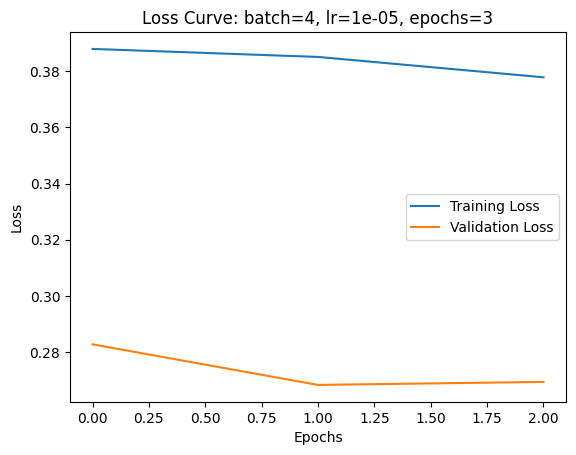

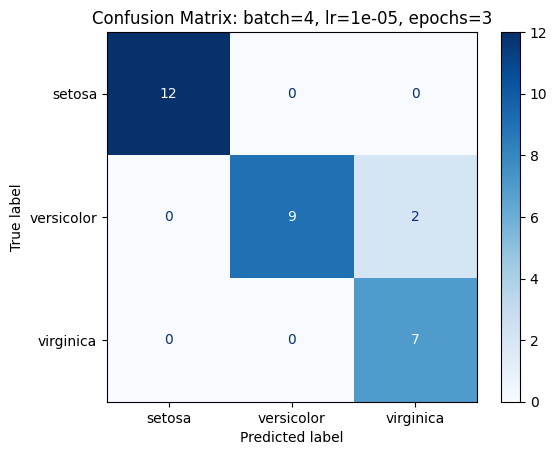

Sample Predictions:
Input: [0.26470588 0.95454545 0.07142857 0.        ]
Predicted: setosa
Truth: setosa

Input: [0.70588235 0.45454545 0.73214286 0.91666667]
Predicted: virginica
Truth: virginica

Input: [0.70588235 0.22727273 0.83928571 0.70833333]
Predicted: virginica
Truth: virginica

Input: [0.32352941 0.86363636 0.03571429 0.125     ]
Predicted: setosa
Truth: setosa

Input: [0.58823529 0.22727273 0.69642857 0.75      ]
Predicted: virginica
Truth: virginica

Training with batch size=4, learning rate=1e-05, epochs=5
Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9609 - loss: 0.3907 - val_accuracy: 1.0000 - val_loss: 0.2672
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9247 - loss: 0.4089 - val_accuracy: 1.0000 - val_loss: 0.2588
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9391 - loss: 0.3267 - val_accuracy: 1.0000 - val_loss: 0.2556
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9355 - loss: 0.3711 - val_accuracy: 

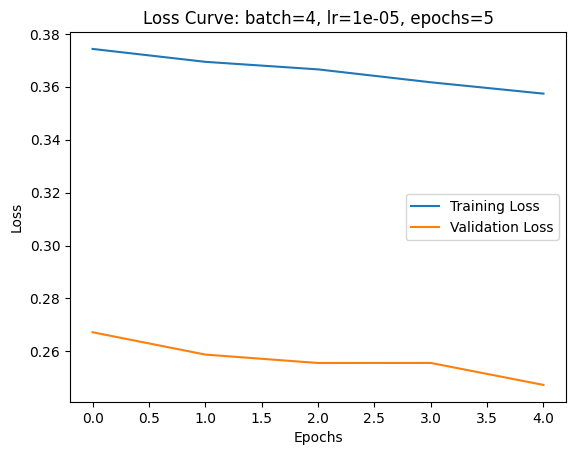

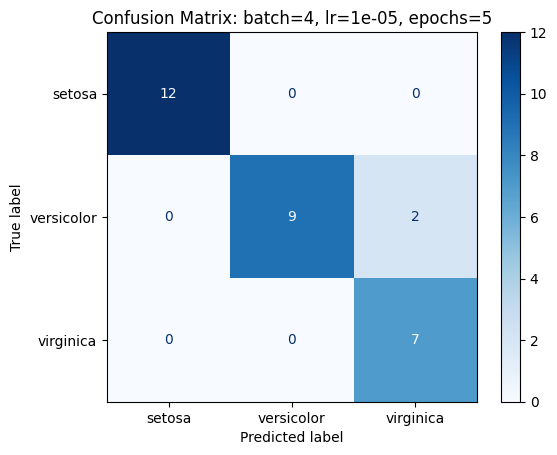

Sample Predictions:
Input: [0.26470588 0.95454545 0.07142857 0.        ]
Predicted: setosa
Truth: setosa

Input: [0.70588235 0.45454545 0.73214286 0.91666667]
Predicted: virginica
Truth: virginica

Input: [0.70588235 0.22727273 0.83928571 0.70833333]
Predicted: virginica
Truth: virginica

Input: [0.32352941 0.86363636 0.03571429 0.125     ]
Predicted: setosa
Truth: setosa

Input: [0.58823529 0.22727273 0.69642857 0.75      ]
Predicted: virginica
Truth: virginica



In [22]:
# Train and evaluate with separate configurations
log_results = []
log_results.append(train_and_evaluate(batch_size=2, learning_rate=1e-3, epochs=1, model=model))
log_results.append(train_and_evaluate(batch_size=2, learning_rate=1e-3, epochs=3, model=model))
log_results.append(train_and_evaluate(batch_size=2, learning_rate=1e-3, epochs=5, model=model))
log_results.append(train_and_evaluate(batch_size=2, learning_rate=1e-5, epochs=1, model=model))
log_results.append(train_and_evaluate(batch_size=2, learning_rate=1e-5, epochs=3, model=model))
log_results.append(train_and_evaluate(batch_size=2, learning_rate=1e-5, epochs=5, model=model))
log_results.append(train_and_evaluate(batch_size=4, learning_rate=1e-3, epochs=1, model=model))
log_results.append(train_and_evaluate(batch_size=4, learning_rate=1e-3, epochs=3, model=model))
log_results.append(train_and_evaluate(batch_size=4, learning_rate=1e-3, epochs=5, model=model))
log_results.append(train_and_evaluate(batch_size=4, learning_rate=1e-5, epochs=1, model=model))
log_results.append(train_and_evaluate(batch_size=4, learning_rate=1e-5, epochs=3, model=model))
log_results.append(train_and_evaluate(batch_size=4, learning_rate=1e-5, epochs=5, model=model))

In [23]:
# Save logs to a file
import json
with open('training_logs.json', 'w') as log_file:
    json.dump(log_results, log_file, indent=4)

_______________________________________________________

##Task 2: Automated Hyperparameter Search

In [3]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [19]:
# Convert to a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [20]:
# Split the dataset
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
test_data, val_data = train_test_split(test_data, test_size=1/3, random_state=42)

# Save train and test data to CSV (required format for AutoGluon)
train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)

In [14]:
# Step 4: Automated Model Training
print("\n=== Step 4: Automated Model Training ===")

def train_auto_model(train_data,strategy):
    """
    Train model with automated hyperparameter optimization.
    More robust version with proper error handling.
    """
    # Define a simpler search space to start with
    search_space = {
        'NN_TORCH': {
            'num_epochs': [1,3,5],
            'learning_rate': [1e-3,1e-5],
            'batch_size': [2,4],
            'num_layers': [3],
            'activation': 'relu',
            'loss': 'cross_entropy',
            'hidden_size': [16]
        }
    }

    print("\nHyperparameter Configuration:")
    for param, value in search_space['NN_TORCH'].items():
        print(f"{param}: {value}")

    predictor = TabularPredictor(
        label='target',
        eval_metric='accuracy',
        path='/content/model',
        problem_type='multiclass'
    )

    print("\nStarting model training...")
    try:
        # Try fitting with more basic configuration
        predictor.fit(
            train_data,
            hyperparameters=search_space,
            time_limit=600,           # 10 minutes
            verbosity=4,              # Maximum verbosity for debugging
            included_model_types=['NN_TORCH'],
            raise_on_no_models_fitted=False,  # Don't raise error if fitting fails
            hyperparameter_tune_kwargs={
                'num_trials': 12,
                'scheduler': 'local',
                'searcher': strategy,
            }
        )

        # Check if models were fitted successfully
        if len(predictor.get_model_names()) > 0:
            print("\nModel Leaderboard:")
            print(predictor.leaderboard())
            return predictor
        else:
            raise RuntimeError("No models were fitted successfully")

    except Exception as e:
        print(f"\nError during model training: {str(e)}")
        print("\nTrying alternative approach...")

        # Try with even simpler configuration
        try:
            predictor = TabularPredictor(
                label='target',
                eval_metric='accuracy',
        path='/content/model',
        problem_type='multiclass'
            )

            predictor.fit(
                train_data,
                hyperparameters={'NN_TORCH': {}},  # Let AutoGluon handle all parameters
                time_limit=600,
                verbosity=4,
                included_model_types=['NN_TORCH'],
                raise_on_no_models_fitted=False,
                hyperparameter_tune_kwargs={
                'num_trials': 12,
                'scheduler': 'local',
                'searcher': strategy,
            }
            )

            if len(predictor.get_model_names()) > 0:
                print("\nModel Leaderboard (Alternative Approach):")
                print(predictor.leaderboard())
                return predictor
            else:
                raise RuntimeError("Alternative approach also failed to fit models")

        except Exception as e2:
            print(f"\nError during alternative approach: {str(e2)}")

            # Final fallback: Try with all model types
            print("\nTrying final fallback with all model types...")
            predictor = TabularPredictor(
                label='target',
                eval_metric='accuracy',
        path='/content/model',
        problem_type='multiclass'
            )

            predictor.fit(
                train_data,
                time_limit=600,
                verbosity=4,
                raise_on_no_models_fitted=False,
                hyperparameter_tune_kwargs={
                'num_trials': 12,
                'scheduler': 'local',
                'searcher': strategy,
            }
            )

            print("\nFinal Model Leaderboard:")
            print(predictor.leaderboard())
            return predictor

# Let's also verify our data before training
print("\nVerifying data before training:")
print(f"Training data shape: {train_data.shape}")
print("\nSample of training data:")
print(train_data.head())
print("\nTarget distribution:")
print(train_data['target'].value_counts(normalize=True))

# Train the model
print("\nStarting automated model training...")
auto_predictor_random = train_auto_model(train_data,'random')
print("\nAutomated model training completed!")

Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.75 GB / 12.67 GB (84.9%)
Disk Space Avail:   69.97 GB / 107.72 GB (65.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy wi


=== Step 4: Automated Model Training ===

Verifying data before training:
Training data shape: (120, 5)

Sample of training data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
22                4.6               3.6                1.0               0.2   
15                5.7               4.4                1.5               0.4   
65                6.7               3.1                4.4               1.4   
11                4.8               3.4                1.6               0.2   
42                4.4               3.2                1.3               0.2   

    target  
22       0  
15       0  
65       1  
11       0  
42       0  

Target distribution:
target
1    0.341667
0    0.333333
2    0.325000
Name: proportion, dtype: float64

Starting automated model training...

Hyperparameter Configuration:
num_epochs: [1, 3, 5]
learning_rate: [0.001, 1e-05]
batch_size: [2, 4]
num_layers: [3]
activation: relu
loss: cross_entropy
hidden_size: 

	Fitting NeuralNetTorch with 'num_gpus': 0, 'num_cpus': 2
Starting generic AbstractModel hyperparameter tuning for NeuralNetTorch model...
	Hyperparameter search space for NeuralNetTorch: 
embedding_size_factor:   Categorical[1.0, 0.5, 1.5, 0.7, 0.6, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4]
dropout_prob:   Categorical[0.1, 0.0, 0.5, 0.2, 0.3, 0.4]
weight_decay:   Real: lower=1e-12, upper=0.1
proc.embed_min_categories:   Categorical[4, 3, 10, 100, 1000]
proc.impute_strategy:   Categorical['median', 'mean', 'most_frequent']
proc.max_category_levels:   Categorical[100, 10, 20, 200, 300, 400, 500, 1000, 10000]
proc.skew_threshold:   Categorical[0.99, 0.2, 0.3, 0.5, 0.8, 0.9, 0.999, 1.0, 10.0, 100.0]
use_batchnorm:   Categorical[False, True]
Resources info for CpuResourceCalculator: {'resources_per_job': {'cpu': 1}, 'num_parallel_jobs': 2, 'batches': 6, 'cpu_per_job': 1}
resources_per_trial to be dispatched by ray tune: {'cpu': 1}


+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 12                    |
+--------------------------------------------------------+

View detailed results here: /content/model/models/NeuralNetTorch


No model was trained during hyperparameter tuning NeuralNetTorch... Skipping this model.
Saving /content/model/models/trainer.pkl
No base models to train on, skipping auxiliary stack level 2...
Saving /content/model/models/trainer.pkl
Saving /content/model/models/trainer.pkl
AutoGluon training complete, total runtime = 100.13s ... Best model: None
Loading: /content/model/models/trainer.pkl
Saving /content/model/models/trainer.pkl
Saving /content/model/learner.pkl
Saving /content/model/predictor.pkl
Saving /content/model/version.txt with contents "1.2"
Saving /content/model/metadata.json
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/model")
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail



Error during model training: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead

Trying alternative approach...


			Types of features in original data (raw dtype, special dtypes):
				('float', []) : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			Types of features in processed data (exact raw dtype, raw dtype):
				('float64', 'float') : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			Types of features in processed data (raw dtype, special dtypes):
				('float', []) : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			0.0s = Fit runtime
			4 features in original data used to generate 4 features in processed data.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
			Types of features in original data (raw dtype, special dtypes):
				('float', []) : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			Types of features in processed data (exact raw dtype, raw dtype):
				('float64', 'float') : 4 | ['sepal length (cm)', 'sepal width (c

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 12                    |
+--------------------------------------------------------+

View detailed results here: /content/model/models/NeuralNetTorch


Loading: /content/model/models/NeuralNetTorch/4b6a7_00000/model.pkl
Fitted model: NeuralNetTorch/4b6a7_00000 ...
	1.0	 = Validation score   (accuracy)
	7.77s	 = Training   runtime
	0.01s	 = Validation runtime
	3416.3	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/4b6a7_00001/model.pkl
Fitted model: NeuralNetTorch/4b6a7_00001 ...
	1.0	 = Validation score   (accuracy)
	7.84s	 = Training   runtime
	0.01s	 = Validation runtime
	1889.6	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/4b6a7_00002/model.pkl
Fitted model: NeuralNetTorch/4b6a7_00002 ...
	1.0	 = Validation score   (accuracy)
	12.16s	 = Training   runtime
	0.02s	 = Validation runtime
	1330.6	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/4b6a7_00003/model.pkl
Fitted model: NeuralNetTorch/4b6a7_00003 ...
	1.0	 = Validation score   (accuracy)
	12.41s	 = Training   runtime
	0.01s	 = Validat

Loading: /content/model/models/NeuralNetTorch/4b6a7_00006/model.pkl
Fitted model: NeuralNetTorch/4b6a7_00006 ...
	1.0	 = Validation score   (accuracy)
	10.03s	 = Training   runtime
	0.01s	 = Validation runtime
	3327.5	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/4b6a7_00007/model.pkl
Fitted model: NeuralNetTorch/4b6a7_00007 ...
	1.0	 = Validation score   (accuracy)
	9.22s	 = Training   runtime
	0.01s	 = Validation runtime
	2049.6	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/4b6a7_00008/model.pkl
Fitted model: NeuralNetTorch/4b6a7_00008 ...
	1.0	 = Validation score   (accuracy)
	9.87s	 = Training   runtime
	0.03s	 = Validation runtime
	835.6	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/4b6a7_00009/model.pkl
Fitted model: NeuralNetTorch/4b6a7_00009 ...
	1.0	 = Validation score   (accuracy)
	9.9s	 = Training   runtime
	0.01s	 = Validation


Error during alternative approach: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead

Trying final fallback with all model types...


				('float', []) : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			Types of features in processed data (exact raw dtype, raw dtype):
				('float64', 'float') : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			Types of features in processed data (raw dtype, special dtypes):
				('float', []) : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			0.0s = Fit runtime
			4 features in original data used to generate 4 features in processed data.
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
			Types of features in original data (raw dtype, special dtypes):
				('float', []) : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			Types of features in processed data (exact raw dtype, raw dtype):
				('float64', 'float') : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			Types of f

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetFastAI       |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 12                    |
+--------------------------------------------------------+

View detailed results here: /content/model/models/NeuralNetFastAI


Loading: /content/model/models/NeuralNetFastAI/954b1_00000/model.pkl
Loading: /content/model/models/NeuralNetFastAI/954b1_00000/model-internals.pkl
Fitted model: NeuralNetFastAI/954b1_00000 ...
	1.0	 = Validation score   (accuracy)
	9.83s	 = Training   runtime
	0.01s	 = Validation runtime
	1649.6	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetFastAI/954b1_00001/model.pkl
Loading: /content/model/models/NeuralNetFastAI/954b1_00001/model-internals.pkl
Fitted model: NeuralNetFastAI/954b1_00001 ...
	1.0	 = Validation score   (accuracy)
	9.32s	 = Training   runtime
	0.02s	 = Validation runtime
	1590.2	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetFastAI/954b1_00002/model.pkl
Loading: /content/model/models/NeuralNetFastAI/954b1_00002/model-internals.pkl
Fitted model: NeuralNetFastAI/954b1_00002 ...
	0.875	 = Validation score   (accuracy)
	6.0s	 = Training   runtime
	0.02s	 = Validation runtime
	1118.4	 = In

  0%|          | 0/12 [00:00<?, ?it/s]

Loading: /content/model/models/LightGBMXT/dataset_train.pkl
Loading: /content/model/models/LightGBMXT/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True, 'feature_fraction': 1.0, 'min_data_in_leaf': 20, 'num_leaves': 31}
Saving /content/model/models/LightGBMXT/T1/model.pkl
Loading: /content/model/models/LightGBMXT/dataset_train.pkl
Loading: /content/model/models/LightGBMXT/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.06994332504138302, 'extra_trees': True, 'feature_fraction': 0.8872033759818312, 'min_data_in_leaf': 5, 'num_leaves': 83}
Saving /content/model/models/LightGBMXT/T2/model.pkl
Loading: /content/model/models/LightGBMXT/dataset_train.pkl
Loading: /content/model/models/LightGBMXT/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.049883446878335284, 'extra_trees': True, 'feature_fraction': 0.9618129346960314, 'min_data_in_leaf': 52, 'num_leaves': 52}
Saving /content/mo

  0%|          | 0/12 [00:00<?, ?it/s]

Loading: /content/model/models/LightGBM/dataset_train.pkl
Loading: /content/model/models/LightGBM/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'feature_fraction': 1.0, 'min_data_in_leaf': 20, 'num_leaves': 31}
Saving /content/model/models/LightGBM/T1/model.pkl
Loading: /content/model/models/LightGBM/dataset_train.pkl
Loading: /content/model/models/LightGBM/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.06994332504138302, 'feature_fraction': 0.8872033759818312, 'min_data_in_leaf': 5, 'num_leaves': 83}
Saving /content/model/models/LightGBM/T2/model.pkl
Loading: /content/model/models/LightGBM/dataset_train.pkl
Loading: /content/model/models/LightGBM/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.049883446878335284, 'feature_fraction': 0.9618129346960314, 'min_data_in_leaf': 52, 'num_leaves': 52}
Saving /content/model/models/LightGBM/T3/model.pkl
Loading: /content/model/models/LightGBM/datase

  0%|          | 0/12 [00:00<?, ?it/s]

Loading: /content/model/models/CatBoost/dataset_train.pkl
Loading: /content/model/models/CatBoost/dataset_val.pkl
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'depth': 6, 'l2_leaf_reg': 3, 'thread_count': 1}
Saving /content/model/models/CatBoost/T1/model.pkl
Loading: /content/model/models/CatBoost/dataset_train.pkl
Loading: /content/model/models/CatBoost/dataset_val.pkl
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.11259896076097302, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'depth': 5, 'l2_leaf_reg': 3.3713784729000733, 'thread_count': 1}
Saving /content/model/models/CatBoost/T2/model.pkl
Loading: /content/model/models/CatBoost/dataset_train.pkl
Loading: /content/model/models/CatBoost/dataset_val.pkl
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.02386109712430462, 'random_seed': 0, 'allow_wr

  0%|          | 0/12 [00:00<?, ?it/s]

Loading: /content/model/models/XGBoost/dataset_train.pkl
Loading: /content/model/models/XGBoost/dataset_val.pkl
Saving /content/model/models/XGBoost/T1/model.pkl
Loading: /content/model/models/XGBoost/dataset_train.pkl
Loading: /content/model/models/XGBoost/dataset_val.pkl
Saving /content/model/models/XGBoost/T2/model.pkl
Loading: /content/model/models/XGBoost/dataset_train.pkl
Loading: /content/model/models/XGBoost/dataset_val.pkl
Saving /content/model/models/XGBoost/T3/model.pkl
Loading: /content/model/models/XGBoost/dataset_train.pkl
Loading: /content/model/models/XGBoost/dataset_val.pkl
Saving /content/model/models/XGBoost/T4/model.pkl
Loading: /content/model/models/XGBoost/dataset_train.pkl
Loading: /content/model/models/XGBoost/dataset_val.pkl
Saving /content/model/models/XGBoost/T5/model.pkl
Loading: /content/model/models/XGBoost/dataset_train.pkl
Loading: /content/model/models/XGBoost/dataset_val.pkl
Saving /content/model/models/XGBoost/T6/model.pkl
Loading: /content/model/mode

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 12                    |
+--------------------------------------------------------+

View detailed results here: /content/model/models/NeuralNetTorch


Loading: /content/model/models/NeuralNetTorch/bf65d_00000/model.pkl
Fitted model: NeuralNetTorch/bf65d_00000 ...
	1.0	 = Validation score   (accuracy)
	9.21s	 = Training   runtime
	0.01s	 = Validation runtime
	3985.7	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/bf65d_00001/model.pkl
Fitted model: NeuralNetTorch/bf65d_00001 ...
	1.0	 = Validation score   (accuracy)
	8.84s	 = Training   runtime
	0.01s	 = Validation runtime
	3414.3	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/bf65d_00002/model.pkl
Fitted model: NeuralNetTorch/bf65d_00002 ...
	1.0	 = Validation score   (accuracy)
	9.6s	 = Training   runtime
	0.01s	 = Validation runtime
	3276.9	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/bf65d_00003/model.pkl
Fitted model: NeuralNetTorch/bf65d_00003 ...
	1.0	 = Validation score   (accuracy)
	9.94s	 = Training   runtime
	0.0s	 = Validation 


[1]	valid_set's multi_error: 0.0416667
[2]	valid_set's multi_error: 0.0416667
[3]	valid_set's multi_error: 0.0416667
[4]	valid_set's multi_error: 0.0416667
[5]	valid_set's multi_error: 0.0416667
[6]	valid_set's multi_error: 0.0416667
[7]	valid_set's multi_error: 0.0416667
[8]	valid_set's multi_error: 0.0416667
[9]	valid_set's multi_error: 0.0416667
[10]	valid_set's multi_error: 0.0416667
[11]	valid_set's multi_error: 0.0416667
[12]	valid_set's multi_error: 0.0416667
[13]	valid_set's multi_error: 0.0416667
[14]	valid_set's multi_error: 0.0416667
[15]	valid_set's multi_error: 0.0416667
[16]	valid_set's multi_error: 0.0416667
[17]	valid_set's multi_error: 0.0833333
[18]	valid_set's multi_error: 0.0833333
[19]	valid_set's multi_error: 0.0833333
[20]	valid_set's multi_error: 0.0416667
[21]	valid_set's multi_error: 0.0416667
[22]	valid_set's multi_error: 0.0416667
[23]	valid_set's multi_error: 0.0416667
[24]	valid_set's multi_error: 0.0416667
[25]	valid_set's multi_error: 0.0416667
[26]	val

Saving /content/model/models/LightGBMLarge/model.pkl
Saving /content/model/utils/attr/LightGBMLarge/y_pred_proba_val.pkl
	1.0	 = Validation score   (accuracy)
	0.68s	 = Training   runtime
	0.01s	 = Validation runtime
	2777.1	 = Inference  throughput (rows/s | 24 batch size)
Saving /content/model/models/trainer.pkl


[215]	valid_set's multi_error: 0
[216]	valid_set's multi_error: 0
[217]	valid_set's multi_error: 0
[218]	valid_set's multi_error: 0
[219]	valid_set's multi_error: 0
[220]	valid_set's multi_error: 0
[221]	valid_set's multi_error: 0
[222]	valid_set's multi_error: 0
[223]	valid_set's multi_error: 0
[224]	valid_set's multi_error: 0
[225]	valid_set's multi_error: 0
[226]	valid_set's multi_error: 0
[227]	valid_set's multi_error: 0
[228]	valid_set's multi_error: 0
[229]	valid_set's multi_error: 0
[230]	valid_set's multi_error: 0
[231]	valid_set's multi_error: 0
[232]	valid_set's multi_error: 0
[233]	valid_set's multi_error: 0
[234]	valid_set's multi_error: 0
[235]	valid_set's multi_error: 0
[236]	valid_set's multi_error: 0
[237]	valid_set's multi_error: 0
[238]	valid_set's multi_error: 0
[239]	valid_set's multi_error: 0
[240]	valid_set's multi_error: 0
[241]	valid_set's multi_error: 0
[242]	valid_set's multi_error: 0
[243]	valid_set's multi_error: 0
[244]	valid_set's multi_error: 0
[245]	vali

Loading: /content/model/utils/attr/LightGBMLarge/y_pred_proba_val.pkl
Loading: /content/model/models/CatBoost/T1/model.pkl
Loading: /content/model/models/CatBoost/T10/model.pkl
Loading: /content/model/models/CatBoost/T11/model.pkl
Loading: /content/model/models/CatBoost/T12/model.pkl
Loading: /content/model/models/CatBoost/T2/model.pkl
Loading: /content/model/models/CatBoost/T3/model.pkl
Loading: /content/model/models/CatBoost/T4/model.pkl
Loading: /content/model/models/CatBoost/T5/model.pkl
Loading: /content/model/models/CatBoost/T6/model.pkl
Loading: /content/model/models/CatBoost/T7/model.pkl
Loading: /content/model/models/CatBoost/T8/model.pkl
Loading: /content/model/models/CatBoost/T9/model.pkl
Loading: /content/model/models/ExtraTreesEntr/model.pkl
Loading: /content/model/models/ExtraTreesGini/model.pkl
Loading: /content/model/models/KNeighborsDist/model.pkl
Loading: /content/model/models/KNeighborsUnif/model.pkl
Loading: /content/model/models/LightGBM/T1/model.pkl
Loading: /cont


Final Model Leaderboard:
            model  score_val eval_metric  pred_time_val  fit_time  \
0     CatBoost/T7   1.000000    accuracy       0.000666  0.267544   
1    CatBoost/T12   1.000000    accuracy       0.000679  0.231356   
2     CatBoost/T5   1.000000    accuracy       0.000680  0.254290   
3     CatBoost/T4   1.000000    accuracy       0.000684  0.251725   
4     CatBoost/T3   1.000000    accuracy       0.000711  0.545244   
..            ...        ...         ...            ...       ...   
59    LightGBM/T3   0.333333    accuracy       0.000739  0.299323   
60  LightGBMXT/T7   0.333333    accuracy       0.000740  0.317024   
61  LightGBMXT/T8   0.333333    accuracy       0.000775  0.311957   
62    LightGBM/T8   0.333333    accuracy       0.000998  0.407575   
63    LightGBM/T7   0.333333    accuracy       0.000998  0.456367   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000666           0.267544            1       True   

In [15]:
auto_predictor_bayes = train_auto_model(train_data,'bayes')


Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.76 GB / 12.67 GB (84.9%)
Disk Space Avail:   69.90 GB / 107.72 GB (64.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy wi


Hyperparameter Configuration:
num_epochs: [1, 3, 5]
learning_rate: [0.001, 1e-05]
batch_size: [2, 4]
num_layers: [3]
activation: relu
loss: cross_entropy
hidden_size: [16]

Starting model training...


Starting generic AbstractModel hyperparameter tuning for NeuralNetTorch model...
	Hyperparameter search space for NeuralNetTorch: 
embedding_size_factor:   Categorical[1.0, 0.5, 1.5, 0.7, 0.6, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4]
dropout_prob:   Categorical[0.1, 0.0, 0.5, 0.2, 0.3, 0.4]
weight_decay:   Real: lower=1e-12, upper=0.1
proc.embed_min_categories:   Categorical[4, 3, 10, 100, 1000]
proc.impute_strategy:   Categorical['median', 'mean', 'most_frequent']
proc.max_category_levels:   Categorical[100, 10, 20, 200, 300, 400, 500, 1000, 10000]
proc.skew_threshold:   Categorical[0.99, 0.2, 0.3, 0.5, 0.8, 0.9, 0.999, 1.0, 10.0, 100.0]
use_batchnorm:   Categorical[False, True]
Resources info for CpuResourceCalculator: {'resources_per_job': {'cpu': 1}, 'num_parallel_jobs': 2, 'batches': 6, 'cpu_per_job': 1}
resources_per_trial to be dispatched by ray tune: {'cpu': 1}


+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 12               |
+---------------------------------------------------+

View detailed results here: /content/model/models/NeuralNetTorch


No model was trained during hyperparameter tuning NeuralNetTorch... Skipping this model.
Saving /content/model/models/trainer.pkl
No base models to train on, skipping auxiliary stack level 2...
Saving /content/model/models/trainer.pkl
Saving /content/model/models/trainer.pkl
AutoGluon training complete, total runtime = 94.85s ... Best model: None
Loading: /content/model/models/trainer.pkl
Saving /content/model/models/trainer.pkl
Saving /content/model/learner.pkl
Saving /content/model/predictor.pkl
Saving /content/model/version.txt with contents "1.2"
Saving /content/model/metadata.json
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/model")
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:



Error during model training: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead

Trying alternative approach...


		Skipping DatetimeFeatureGenerator: No input feature with required dtypes.
		Skipping TextSpecialFeatureGenerator: No input feature with required dtypes.
		Skipping TextNgramFeatureGenerator: No input feature with required dtypes.
		Skipping IdentityFeatureGenerator: No input feature with required dtypes.
		Skipping IsNanFeatureGenerator: No input feature with required dtypes.
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
			Types of features in original data (raw dtype, special dtypes):
				('float', []) : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			Types of features in processed data (exact raw dtype, raw dtype):
				('float64', 'float') : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			Types of features in processed data (raw dtype, special dtypes):
				('float', []) : 4 | ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
			0.0s = Fit runtime
			4

+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 12               |
+---------------------------------------------------+

View detailed results here: /content/model/models/NeuralNetTorch


Loading: /content/model/models/NeuralNetTorch/7692ba29/model.pkl
Fitted model: NeuralNetTorch/7692ba29 ...
	1.0	 = Validation score   (accuracy)
	10.86s	 = Training   runtime
	0.01s	 = Validation runtime
	3327.1	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/176bf6e3/model.pkl
Fitted model: NeuralNetTorch/176bf6e3 ...
	1.0	 = Validation score   (accuracy)
	13.87s	 = Training   runtime
	0.02s	 = Validation runtime
	1326.4	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/548c5053/model.pkl
Fitted model: NeuralNetTorch/548c5053 ...
	1.0	 = Validation score   (accuracy)
	7.76s	 = Training   runtime
	0.02s	 = Validation runtime
	1189.7	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/8782e1f2/model.pkl


Fitted model: NeuralNetTorch/8782e1f2 ...
	1.0	 = Validation score   (accuracy)
	14.17s	 = Training   runtime
	0.01s	 = Validation runtime
	3115.6	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/65e1a348/model.pkl
Fitted model: NeuralNetTorch/65e1a348 ...
	1.0	 = Validation score   (accuracy)
	12.73s	 = Training   runtime
	0.02s	 = Validation runtime
	1497.9	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/23e531a1/model.pkl
Fitted model: NeuralNetTorch/23e531a1 ...
	1.0	 = Validation score   (accuracy)
	13.88s	 = Training   runtime
	0.03s	 = Validation runtime
	699.1	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/199ec4b5/model.pkl
Fitted model: NeuralNetTorch/199ec4b5 ...
	1.0	 = Validation score   (accuracy)
	14.54s	 = Training   runtime
	0.02s	 = Validation runtime
	1552.1	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/


Error during alternative approach: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead

Trying final fallback with all model types...


Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 96, Val Rows: 24
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{}],
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, {'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 3, 'ag_args': {'name_suffix': 'Large', 'priority': 0, 'hyperparameter_tune_kwargs': None}}],
	'CAT': [{}],
	'XGB': [{}],
	'FASTAI': [{}],
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multicla

+----------------------------------------------------+
| Configuration for experiment     NeuralNetFastAI   |
+----------------------------------------------------+
| Search algorithm                 SearchGenerator   |
| Scheduler                        FIFOScheduler     |
| Number of trials                 12                |
+----------------------------------------------------+

View detailed results here: /content/model/models/NeuralNetFastAI


Loading: /content/model/models/NeuralNetFastAI/eef18f43/model.pkl
Loading: /content/model/models/NeuralNetFastAI/eef18f43/model-internals.pkl
Fitted model: NeuralNetFastAI/eef18f43 ...
	1.0	 = Validation score   (accuracy)
	8.57s	 = Training   runtime
	0.03s	 = Validation runtime
	742.7	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetFastAI/7bd5d410/model.pkl
Loading: /content/model/models/NeuralNetFastAI/7bd5d410/model-internals.pkl
Fitted model: NeuralNetFastAI/7bd5d410 ...
	1.0	 = Validation score   (accuracy)
	11.0s	 = Training   runtime
	0.01s	 = Validation runtime
	1833.7	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetFastAI/f5940a6b/model.pkl
Loading: /content/model/models/NeuralNetFastAI/f5940a6b/model-internals.pkl
Fitted model: NeuralNetFastAI/f5940a6b ...
	1.0	 = Validation score   (accuracy)
	11.12s	 = Training   runtime
	0.02s	 = Validation runtime
	1551.6	 = Inference  throughput (rows/s 

  0%|          | 0/12 [00:00<?, ?it/s]

Loading: /content/model/models/LightGBMXT/dataset_train.pkl
Loading: /content/model/models/LightGBMXT/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'extra_trees': True, 'feature_fraction': 1.0, 'min_data_in_leaf': 20, 'num_leaves': 31}
Saving /content/model/models/LightGBMXT/T1/model.pkl
Loading: /content/model/models/LightGBMXT/dataset_train.pkl
Loading: /content/model/models/LightGBMXT/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.06994332504138302, 'extra_trees': True, 'feature_fraction': 0.8872033759818312, 'min_data_in_leaf': 5, 'num_leaves': 83}
Saving /content/model/models/LightGBMXT/T2/model.pkl
Loading: /content/model/models/LightGBMXT/dataset_train.pkl
Loading: /content/model/models/LightGBMXT/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.049883446878335284, 'extra_trees': True, 'feature_fraction': 0.9618129346960314, 'min_data_in_leaf': 52, 'num_leaves': 52}
Saving /content/mo

  0%|          | 0/12 [00:00<?, ?it/s]

Loading: /content/model/models/LightGBM/dataset_train.pkl
Loading: /content/model/models/LightGBM/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05, 'feature_fraction': 1.0, 'min_data_in_leaf': 20, 'num_leaves': 31}
Saving /content/model/models/LightGBM/T1/model.pkl
Loading: /content/model/models/LightGBM/dataset_train.pkl
Loading: /content/model/models/LightGBM/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.06994332504138302, 'feature_fraction': 0.8872033759818312, 'min_data_in_leaf': 5, 'num_leaves': 83}
Saving /content/model/models/LightGBM/T2/model.pkl
Loading: /content/model/models/LightGBM/dataset_train.pkl
Loading: /content/model/models/LightGBM/dataset_val.pkl
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.049883446878335284, 'feature_fraction': 0.9618129346960314, 'min_data_in_leaf': 52, 'num_leaves': 52}
Saving /content/model/models/LightGBM/T3/model.pkl
Loading: /content/model/models/LightGBM/datase

  0%|          | 0/12 [00:00<?, ?it/s]

Loading: /content/model/models/CatBoost/dataset_train.pkl
Loading: /content/model/models/CatBoost/dataset_val.pkl
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'depth': 6, 'l2_leaf_reg': 3, 'thread_count': 1}
Saving /content/model/models/CatBoost/T1/model.pkl
Loading: /content/model/models/CatBoost/dataset_train.pkl
Loading: /content/model/models/CatBoost/dataset_val.pkl
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.11259896076097302, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'depth': 5, 'l2_leaf_reg': 3.3713784729000733, 'thread_count': 1}
Saving /content/model/models/CatBoost/T2/model.pkl
Loading: /content/model/models/CatBoost/dataset_train.pkl
Loading: /content/model/models/CatBoost/dataset_val.pkl
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.02386109712430462, 'random_seed': 0, 'allow_wr

  0%|          | 0/12 [00:00<?, ?it/s]

Loading: /content/model/models/XGBoost/dataset_train.pkl
Loading: /content/model/models/XGBoost/dataset_val.pkl
Saving /content/model/models/XGBoost/T1/model.pkl
Loading: /content/model/models/XGBoost/dataset_train.pkl
Loading: /content/model/models/XGBoost/dataset_val.pkl
Saving /content/model/models/XGBoost/T2/model.pkl
Loading: /content/model/models/XGBoost/dataset_train.pkl
Loading: /content/model/models/XGBoost/dataset_val.pkl
Saving /content/model/models/XGBoost/T3/model.pkl
Loading: /content/model/models/XGBoost/dataset_train.pkl
Loading: /content/model/models/XGBoost/dataset_val.pkl
Saving /content/model/models/XGBoost/T4/model.pkl
Loading: /content/model/models/XGBoost/dataset_train.pkl
Loading: /content/model/models/XGBoost/dataset_val.pkl
Saving /content/model/models/XGBoost/T5/model.pkl
Loading: /content/model/models/XGBoost/dataset_train.pkl
Loading: /content/model/models/XGBoost/dataset_val.pkl
Saving /content/model/models/XGBoost/T6/model.pkl
Loading: /content/model/mode

+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 12               |
+---------------------------------------------------+

View detailed results here: /content/model/models/NeuralNetTorch


Loading: /content/model/models/NeuralNetTorch/cb319b80/model.pkl
Fitted model: NeuralNetTorch/cb319b80 ...
	1.0	 = Validation score   (accuracy)
	10.88s	 = Training   runtime
	0.02s	 = Validation runtime
	1298.7	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/f8fad52d/model.pkl
Fitted model: NeuralNetTorch/f8fad52d ...
	1.0	 = Validation score   (accuracy)
	8.95s	 = Training   runtime
	0.02s	 = Validation runtime
	1245.8	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/f95718f6/model.pkl
Fitted model: NeuralNetTorch/f95718f6 ...
	1.0	 = Validation score   (accuracy)
	11.77s	 = Training   runtime
	0.01s	 = Validation runtime
	3117.5	 = Inference  throughput (rows/s | 24 batch size)
Loading: /content/model/models/NeuralNetTorch/2de74faf/model.pkl
Fitted model: NeuralNetTorch/2de74faf ...
	1.0	 = Validation score   (accuracy)
	7.66s	 = Training   runtime
	0.01s	 = Validation runtime
	1827.1	 = I

Saving /content/model/models/LightGBMLarge/model.pkl
Saving /content/model/utils/attr/LightGBMLarge/y_pred_proba_val.pkl
	1.0	 = Validation score   (accuracy)


[1]	valid_set's multi_error: 0.0416667
[2]	valid_set's multi_error: 0.0416667
[3]	valid_set's multi_error: 0.0416667
[4]	valid_set's multi_error: 0.0416667
[5]	valid_set's multi_error: 0.0416667
[6]	valid_set's multi_error: 0.0416667
[7]	valid_set's multi_error: 0.0416667
[8]	valid_set's multi_error: 0.0416667
[9]	valid_set's multi_error: 0.0416667
[10]	valid_set's multi_error: 0.0416667
[11]	valid_set's multi_error: 0.0416667
[12]	valid_set's multi_error: 0.0416667
[13]	valid_set's multi_error: 0.0416667
[14]	valid_set's multi_error: 0.0416667
[15]	valid_set's multi_error: 0.0416667
[16]	valid_set's multi_error: 0.0416667
[17]	valid_set's multi_error: 0.0833333
[18]	valid_set's multi_error: 0.0833333
[19]	valid_set's multi_error: 0.0833333
[20]	valid_set's multi_error: 0.0416667
[21]	valid_set's multi_error: 0.0416667
[22]	valid_set's multi_error: 0.0416667
[23]	valid_set's multi_error: 0.0416667
[24]	valid_set's multi_error: 0.0416667
[25]	valid_set's multi_error: 0.0416667
[26]	vali

	0.53s	 = Training   runtime
	0.01s	 = Validation runtime
	4650.4	 = Inference  throughput (rows/s | 24 batch size)
Saving /content/model/models/trainer.pkl
Loading: /content/model/utils/attr/LightGBMLarge/y_pred_proba_val.pkl
Loading: /content/model/models/CatBoost/T1/model.pkl
Loading: /content/model/models/CatBoost/T10/model.pkl
Loading: /content/model/models/CatBoost/T11/model.pkl
Loading: /content/model/models/CatBoost/T12/model.pkl
Loading: /content/model/models/CatBoost/T2/model.pkl
Loading: /content/model/models/CatBoost/T3/model.pkl
Loading: /content/model/models/CatBoost/T4/model.pkl
Loading: /content/model/models/CatBoost/T5/model.pkl
Loading: /content/model/models/CatBoost/T6/model.pkl
Loading: /content/model/models/CatBoost/T7/model.pkl
Loading: /content/model/models/CatBoost/T8/model.pkl
Loading: /content/model/models/CatBoost/T9/model.pkl
Loading: /content/model/models/ExtraTreesEntr/model.pkl
Loading: /content/model/models/ExtraTreesGini/model.pkl
Loading: /content/mode


Final Model Leaderboard:
            model  score_val eval_metric  pred_time_val  fit_time  \
0     CatBoost/T3   1.000000    accuracy       0.000677  0.550818   
1     CatBoost/T1   1.000000    accuracy       0.000702  0.344015   
2    CatBoost/T10   1.000000    accuracy       0.000721  0.389332   
3     CatBoost/T7   1.000000    accuracy       0.000723  0.260531   
4    LightGBM/T11   1.000000    accuracy       0.000736  0.369724   
..            ...        ...         ...            ...       ...   
59    LightGBM/T8   0.333333    accuracy       0.000759  0.322407   
60  LightGBMXT/T7   0.333333    accuracy       0.000940  0.344790   
61    LightGBM/T7   0.333333    accuracy       0.001001  0.353201   
62    LightGBM/T3   0.333333    accuracy       0.001074  0.517433   
63  LightGBMXT/T8   0.333333    accuracy       0.004063  0.521507   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000677           0.550818            1       True   

In [18]:
auto_predictor_grid = train_auto_model(train_data,'grid')


Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.68 GB / 12.67 GB (84.3%)
Disk Space Avail:   69.83 GB / 107.72 GB (64.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy wi


Hyperparameter Configuration:
num_epochs: [1, 3, 5]
learning_rate: [0.001, 1e-05]
batch_size: [2, 4]
num_layers: [3]
activation: relu
loss: cross_entropy
hidden_size: [16]

Starting model training...


Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 96, Val Rows: 24
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{'num_epochs': [1, 3, 5], 'learning_rate': [0.001, 1e-05], 'batch_size': [2, 4], 'num_layers': [3], 'activation': 'relu', 'loss': 'cross_entropy', 'hidden_size': [16]}],
}
Saving /content/model/utils/data/X.pkl
Saving /content/model/utils/data/y.pkl
Saving /content/model/utils/data/X_val.pkl
Saving /content/model/utils/data/y_val.pkl
Included models: ['NN_TORCH'] (Specified by `included_model_types`, all other model types will be skipped)
Model configs that will be trained (in order):
	NeuralNetTorch: 	{'num_epochs': [1, 3, 5], 'learning_rate': [0.001, 1e-05], 'batch_size': [2, 4], 'num_layers': [3], 'activation': 'relu', 'loss': 'cross_entropy', 'hidden_size': [16], 'ag_args': {'hyperparameter_tune_kwargs': {'num_trials': 12, 'scheduler': 'local', 'searcher': 'grid'}, 'model_type': <class 'autogluon.tabular.models.tabular_n


Error during model training: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead

Trying alternative approach...


	Fitting NeuralNetTorch with 'num_gpus': 0, 'num_cpus': 2
Starting generic AbstractModel hyperparameter tuning for NeuralNetTorch model...
	Hyperparameter search space for NeuralNetTorch: 
activation:   Categorical['relu', 'elu']
embedding_size_factor:   Categorical[1.0, 0.5, 1.5, 0.7, 0.6, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4]
dropout_prob:   Categorical[0.1, 0.0, 0.5, 0.2, 0.3, 0.4]
learning_rate:   Real: lower=0.0001, upper=0.03
weight_decay:   Real: lower=1e-12, upper=0.1
proc.embed_min_categories:   Categorical[4, 3, 10, 100, 1000]
proc.impute_strategy:   Categorical['median', 'mean', 'most_frequent']
proc.max_category_levels:   Categorical[100, 10, 20, 200, 300, 400, 500, 1000, 10000]
proc.skew_threshold:   Categorical[0.99, 0.2, 0.3, 0.5, 0.8, 0.9, 0.999, 1.0, 10.0, 100.0]
num_layers:   Categorical[2, 3, 4]
hidden_size:   Categorical[128, 256, 512]
use_batchnorm:   Categorical[False, True]
Traceback (most recent call last):
  File "<ipython-input-14-1e7b1d04955a>", line 51, in train_aut


Error during alternative approach: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead

Trying final fallback with all model types...


custom backend resource: {'num_gpus': 0, 'num_cpus': 2}, per trial resource: {'num_trials': 12, 'scheduler': 'local', 'searcher': 'grid', 'resources_per_trial': {'num_cpus': 2, 'num_gpus': 0.0}}
Starting generic AbstractModel hyperparameter tuning for KNeighborsUnif model...
	No hyperparameter search space specified for KNeighborsUnif. Skipping HPO. Will train one model based on the provided hyperparameters.
Saving /content/model/models/KNeighborsUnif/model.pkl
Loading: /content/model/models/KNeighborsUnif/model.pkl
Fitted model: KNeighborsUnif ...
	0.9479	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.03s	 = Validation runtime
Saving /content/model/models/trainer.pkl
Hyperparameter tuning model: KNeighborsDist ... Tuning model for up to 41.53s of the 599.8s of remaining time.
	Fitting KNeighborsDist with 'num_gpus': 0, 'num_cpus': 2
custom backend resource: {'num_gpus': 0, 'num_cpus': 2}, per trial resource: {'num_trials': 12, 'scheduler': 'local', 'searcher': 'grid'

[1]	valid_set's multi_error: 0.0416667
[2]	valid_set's multi_error: 0.0416667
[3]	valid_set's multi_error: 0.0416667
[4]	valid_set's multi_error: 0.0416667
[5]	valid_set's multi_error: 0.0416667
[6]	valid_set's multi_error: 0.0416667
[7]	valid_set's multi_error: 0.0416667
[8]	valid_set's multi_error: 0.0416667
[9]	valid_set's multi_error: 0.0416667
[10]	valid_set's multi_error: 0.0416667
[11]	valid_set's multi_error: 0.0416667
[12]	valid_set's multi_error: 0.0416667
[13]	valid_set's multi_error: 0.0416667
[14]	valid_set's multi_error: 0.0416667
[15]	valid_set's multi_error: 0.0416667
[16]	valid_set's multi_error: 0.0416667
[17]	valid_set's multi_error: 0.0833333
[18]	valid_set's multi_error: 0.0833333
[19]	valid_set's multi_error: 0.0833333
[20]	valid_set's multi_error: 0.0416667
[21]	valid_set's multi_error: 0.0416667
[22]	valid_set's multi_error: 0.0416667
[23]	valid_set's multi_error: 0.0416667
[24]	valid_set's multi_error: 0.0416667
[25]	valid_set's multi_error: 0.0416667
[26]	vali

Loading: /content/model/models/ExtraTreesEntr/model.pkl
Loading: /content/model/models/ExtraTreesGini/model.pkl
Loading: /content/model/models/KNeighborsDist/model.pkl
Loading: /content/model/models/KNeighborsUnif/model.pkl
Loading: /content/model/models/RandomForestEntr/model.pkl
Loading: /content/model/models/RandomForestGini/model.pkl
Model configs that will be trained (in order):
	WeightedEnsemble_L2: 	{'ag_args': {'valid_base': False, 'name_bag_suffix': '', 'model_type': <class 'autogluon.core.models.greedy_ensemble.greedy_weighted_ensemble_model.GreedyWeightedEnsembleModel'>, 'priority': 0}, 'ag_args_ensemble': {'save_bag_folds': True}}
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 593.24s of remaining time.
	Dropped 9 of 21 features.
	Fitting WeightedEnsemble_L2 with 'num_gpus': 0, 'num_cpus': 2
Saving /content/model/models/WeightedEnsemble_L2/utils/model_template.pkl
Loading: /content/model/models/WeightedEnsemble_L2/utils/model_template.pkl
Ens


Final Model Leaderboard:
                 model  score_val eval_metric  pred_time_val  fit_time  \
0        LightGBMLarge   1.000000    accuracy       0.001186  0.514796   
1  WeightedEnsemble_L2   1.000000    accuracy       0.003186  0.587299   
2       KNeighborsUnif   0.947917    accuracy       0.026533  0.005413   
3       KNeighborsDist   0.937500    accuracy       0.017649  0.004952   
4       ExtraTreesEntr   0.927083    accuracy       0.104031  0.786521   
5       ExtraTreesGini   0.927083    accuracy       0.105381  0.811347   
6     RandomForestEntr   0.927083    accuracy       0.138912  1.109342   
7     RandomForestGini   0.916667    accuracy       0.231932  1.745946   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.001186           0.514796            1       True   
1                0.001999           0.072504            2       True   
2                0.026533           0.005413            1       True   
3                0.

Loading: /content/model/models/NeuralNetTorch/bf65d_00000/model.pkl
Loading: /content/model/models/WeightedEnsemble_L2/model.pkl
Loading: /content/model/models/WeightedEnsemble_L2/../LightGBMLarge/model.pkl


Random Search - Accuracy: 1.0000, F1-score: 1.0000


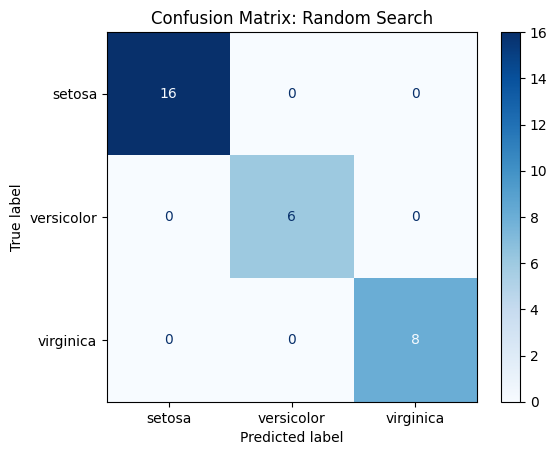

Loading: /content/model/models/NeuralNetTorch/cb319b80/model.pkl
Loading: /content/model/models/WeightedEnsemble_L2/model.pkl
Loading: /content/model/models/WeightedEnsemble_L2/../LightGBMLarge/model.pkl


Hyperband_Bayesian Optimization - Accuracy: 1.0000, F1-score: 1.0000


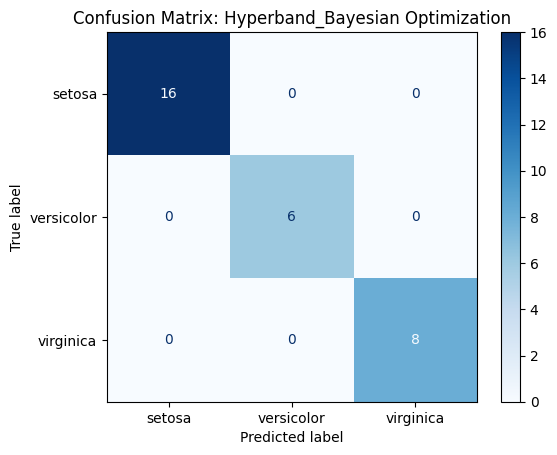


Comparison of Hyperparameter Search Methods:
                     Search Method  Accuracy  F1 Score
0                    Random Search       1.0       1.0
1  Hyperband_Bayesian Optimization       1.0       1.0


In [21]:
def evaluate_model(predictor, test_data, name, results):
    y_pred = predictor.predict(test_data.drop(columns=["target"]))
    y_test = test_data["target"].values

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    results.append([name, accuracy, f1])

    print(f"{name} - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

# Store and compare results
results = []
evaluate_model(auto_predictor_random, test_data, "Random Search", results)
evaluate_model(auto_predictor_bayes, test_data, "Hyperband_Bayesian Optimization", results)

# Create a results table
results_df = pd.DataFrame(results, columns=['Search Method', 'Accuracy', 'F1 Score'])
print("\nComparison of Hyperparameter Search Methods:")
print(results_df)


In [22]:
from autogluon.common import space

nn_options = {
    'num_epochs': space.Categorical(1, 3, 5),
    'learning_rate': space.Categorical(1e-3, 1e-5),
    'batch_size': space.Categorical(2, 4),
}

hyperparameters = {
    'NN_TORCH': nn_options,
}

time_limit = 10 * 60
num_trials = 12
search_strategy = 'random'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': 'local',
    'searcher': search_strategy,
}

predictor_random = TabularPredictor(label='target', eval_metric='accuracy').fit(
    train_data,
    tuning_data=val_data,
    time_limit=time_limit,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250226_161657"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.66 GB / 12.67 GB (84.1%)
Disk Space Avail:   69.83 GB / 107.72 GB (64.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 12                    |
+--------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250226_161657/models/NeuralNetTorch


Fitted model: NeuralNetTorch/19c39_00000 ...
	0.9333	 = Validation score   (accuracy)
	8.98s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/19c39_00001 ...
	0.3333	 = Validation score   (accuracy)
	8.88s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/19c39_00002 ...
	0.6	 = Validation score   (accuracy)
	9.14s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/19c39_00003 ...
	0.3333	 = Validation score   (accuracy)
	8.87s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/19c39_00004 ...
	0.6667	 = Validation score   (accuracy)
	7.37s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/19c39_00005 ...
	0.5333	 = Validation score   (accuracy)
	7.77s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/19c39_00006 ...
	0.9333	 = Validation score   (accuracy)
	7.3s	 = Training   runtime
	0.01s	 = Validation runt

Fitted model: NeuralNetTorch/19c39_00008 ...
	1.0	 = Validation score   (accuracy)
	7.36s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/19c39_00009 ...
	0.7333	 = Validation score   (accuracy)
	6.95s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/19c39_00010 ...
	0.7333	 = Validation score   (accuracy)
	13.09s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/19c39_00011 ...
	0.6667	 = Validation score   (accuracy)
	10.26s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 487.09s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/19c39_00008': 1.0}
	1.0	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 112.94s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1169.5 rows/s (15 batch size)
TabularPredictor

+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 12               |
+---------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250226_161850/models/NeuralNetTorch


Fitted model: NeuralNetTorch/d962023e ...
	0.9333	 = Validation score   (accuracy)
	9.47s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/b07d0c1d ...
	0.8	 = Validation score   (accuracy)
	6.02s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/4c3941bf ...
	0.7333	 = Validation score   (accuracy)
	7.96s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/b86a5f25 ...
	0.6	 = Validation score   (accuracy)
	6.22s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/152225e5 ...
	0.3333	 = Validation score   (accuracy)
	6.71s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/a0e6f3a4 ...
	0.7333	 = Validation score   (accuracy)
	11.17s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/8f91cbf0 ...
	0.5333	 = Validation score   (accuracy)
	7.2s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: Neura

Fitted model: NeuralNetTorch/9a0bbf08 ...
	0.9333	 = Validation score   (accuracy)
	7.31s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/b0bcdf1f ...
	0.6	 = Validation score   (accuracy)
	11.58s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/59e12ce4 ...
	0.6667	 = Validation score   (accuracy)
	4.68s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 485.57s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/d962023e': 1.0}
	0.9333	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 114.46s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1776.8 rows/s (15 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250226_161850")


In [25]:
from autogluon.common import space

nn_options = {
    'num_epochs': space.Categorical(1, 3, 5),
    'learning_rate': space.Categorical(1e-3, 1e-5),
    'batch_size': space.Categorical(2, 4),
}

hyperparameters = {
    'NN_TORCH': nn_options,
}

time_limit = 10 * 60
num_trials = 12
search_strategy = 'bayes'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': 'local',
    'searcher': search_strategy,
}

predictor_bayes = TabularPredictor(label='target', eval_metric='accuracy').fit(
    train_data,
    tuning_data=val_data,
    time_limit=time_limit,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250226_162412"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.74 GB / 12.67 GB (84.7%)
Disk Space Avail:   69.77 GB / 107.72 GB (64.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 12               |
+---------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250226_162412/models/NeuralNetTorch


Fitted model: NeuralNetTorch/18469b8c ...
	0.9333	 = Validation score   (accuracy)
	7.73s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/316590cb ...
	0.6667	 = Validation score   (accuracy)
	11.24s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/2754d037 ...
	0.9333	 = Validation score   (accuracy)
	11.25s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e1f9e07c ...
	1.0	 = Validation score   (accuracy)
	14.53s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/927e612b ...
	0.9333	 = Validation score   (accuracy)
	13.64s	 = Training   runtime
	0.01s	 = Validation runtime


Fitted model: NeuralNetTorch/aee4d2ed ...
	0.6667	 = Validation score   (accuracy)
	11.8s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/59633809 ...
	0.8	 = Validation score   (accuracy)
	7.48s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/684c1af3 ...
	0.8667	 = Validation score   (accuracy)
	9.86s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/e218f5f6 ...
	0.9333	 = Validation score   (accuracy)
	12.29s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/c5118305 ...
	1.0	 = Validation score   (accuracy)
	11.89s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/f59d5f63 ...
	0.6667	 = Validation score   (accuracy)
	9.43s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/cbe6d336 ...
	0.8	 = Validation score   (accuracy)
	4.72s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: Weigh

In [26]:
results_random = predictor_random.fit_summary(verbosity=0)
results_bayes = predictor_bayes.fit_summary(verbosity=0)


In [27]:
import json

with open("results_random.json", "w") as f:
    json.dump(results_random, f, indent=4)

with open("results_bayes.json", "w") as f:
    json.dump(results_bayes, f, indent=4)


NeuralNetTorch/688d8_00000
NeuralNetTorch/688d8_00001
NeuralNetTorch/688d8_00002
NeuralNetTorch/688d8_00003
NeuralNetTorch/688d8_00004
NeuralNetTorch/688d8_00005
NeuralNetTorch/688d8_00006
NeuralNetTorch/688d8_00007
NeuralNetTorch/688d8_00008
NeuralNetTorch/688d8_00009
NeuralNetTorch/688d8_00010
NeuralNetTorch/688d8_00011


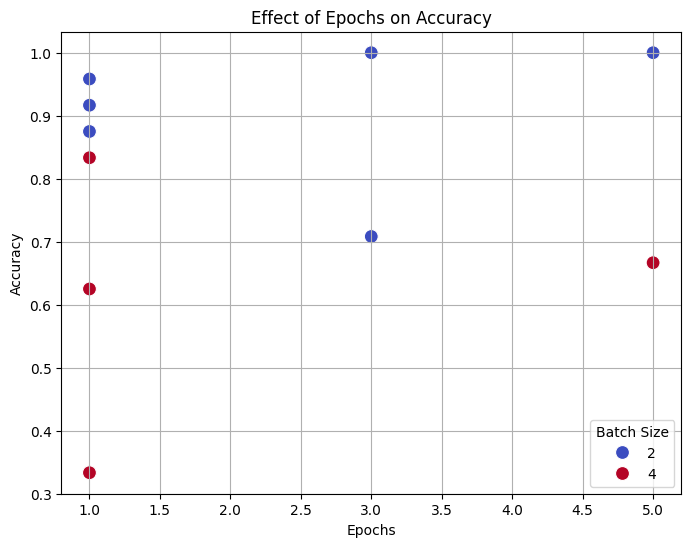

<ipython-input-83-f8a7f11e9c23>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="batch_size", y="accuracy", palette="coolwarm")


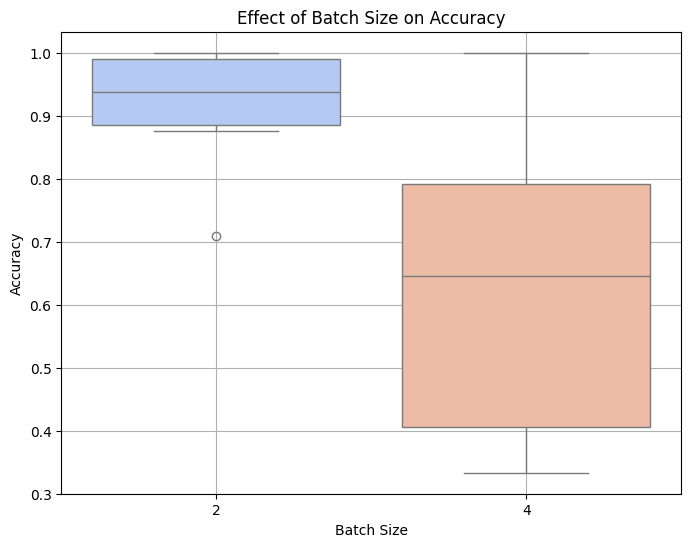


Performance Summary:
                         model  accuracy  epochs  batch_size  learning_rate
1   NeuralNetTorch/688d8_00001  1.000000       3           4        0.00100
2   NeuralNetTorch/688d8_00002  1.000000       3           2        0.00100
3   NeuralNetTorch/688d8_00003  1.000000       5           2        0.00100
10  NeuralNetTorch/688d8_00010  0.958333       1           2        0.00100
9   NeuralNetTorch/688d8_00009  0.916667       1           2        0.00001
0   NeuralNetTorch/688d8_00000  0.875000       1           2        0.00100
11  NeuralNetTorch/688d8_00011  0.833333       1           4        0.00001
6   NeuralNetTorch/688d8_00006  0.708333       3           2        0.00001
7   NeuralNetTorch/688d8_00007  0.666667       5           4        0.00001
4   NeuralNetTorch/688d8_00004  0.625000       1           4        0.00001
5   NeuralNetTorch/688d8_00005  0.333333       1           4        0.00001
8   NeuralNetTorch/688d8_00008  0.333333       1           4      

In [83]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results=results_random
# Extract model names
models = list(results["model_performance"].keys())
# Extract relevant data
performance = results["model_performance"]
hyperparams = results["model_hyperparams"]

data = []
for model in models[:-1]:
    print(model)
    row = {
            "model": model,
            "accuracy": performance[model],
            "epochs": hyperparams[model]['num_epochs'],
            "batch_size": hyperparams[model]["batch_size"],
            "learning_rate": hyperparams[model]["learning_rate"],
      }
    data.append(row)

df = pd.DataFrame(data)

# --- Scatter Plot: Epochs vs Accuracy ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="epochs", y="accuracy", hue="batch_size", palette="coolwarm", s=100)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Effect of Epochs on Accuracy")
plt.legend(title="Batch Size")
plt.grid()
plt.show()

# --- Scatter Plot: Batch Size vs Accuracy ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="batch_size", y="accuracy", palette="coolwarm")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.title("Effect of Batch Size on Accuracy")
plt.grid()
plt.show()

print("\nPerformance Summary:")
print(df.sort_values(by="accuracy", ascending=False))


NeuralNetTorch/18469b8c
NeuralNetTorch/316590cb
NeuralNetTorch/2754d037
NeuralNetTorch/e1f9e07c
NeuralNetTorch/927e612b
NeuralNetTorch/aee4d2ed
NeuralNetTorch/59633809
NeuralNetTorch/684c1af3
NeuralNetTorch/e218f5f6
NeuralNetTorch/c5118305
NeuralNetTorch/f59d5f63
NeuralNetTorch/cbe6d336


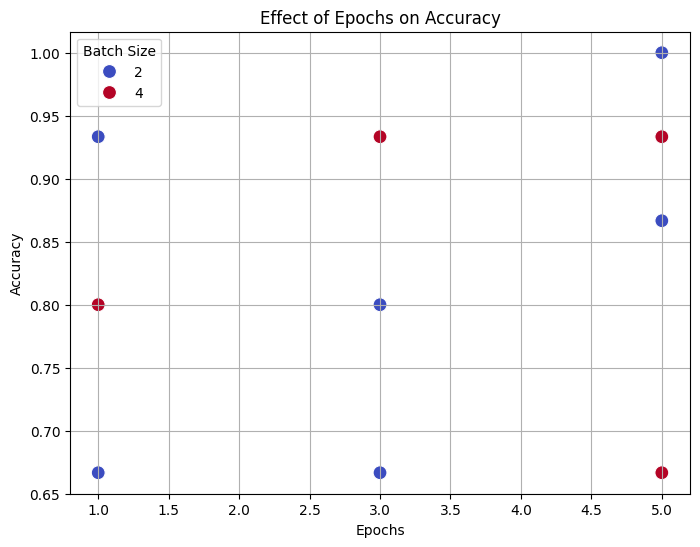

<ipython-input-28-663771d964b2>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="batch_size", y="accuracy", palette="coolwarm")


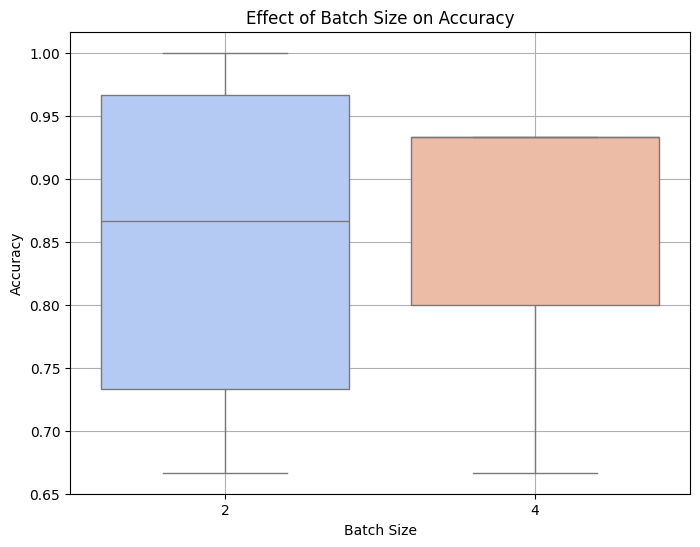


Performance Summary:
                      model  accuracy  epochs  batch_size  learning_rate
3   NeuralNetTorch/e1f9e07c  1.000000       5           2        0.00100
9   NeuralNetTorch/c5118305  1.000000       5           2        0.00100
0   NeuralNetTorch/18469b8c  0.933333       1           2        0.00100
2   NeuralNetTorch/2754d037  0.933333       3           4        0.00100
4   NeuralNetTorch/927e612b  0.933333       5           4        0.00100
8   NeuralNetTorch/e218f5f6  0.933333       5           4        0.00001
7   NeuralNetTorch/684c1af3  0.866667       5           2        0.00001
6   NeuralNetTorch/59633809  0.800000       3           2        0.00100
11  NeuralNetTorch/cbe6d336  0.800000       1           4        0.00001
1   NeuralNetTorch/316590cb  0.666667       3           2        0.00001
5   NeuralNetTorch/aee4d2ed  0.666667       5           4        0.00001
10  NeuralNetTorch/f59d5f63  0.666667       1           2        0.00001


In [28]:
results=results_bayes
# Extract model names
models = list(results["model_performance"].keys())
# Extract relevant data
performance = results["model_performance"]
hyperparams = results["model_hyperparams"]

data = []
for model in models[:-1]:
    print(model)
    row = {
            "model": model,
            "accuracy": performance[model],
            "epochs": hyperparams[model]['num_epochs'],
            "batch_size": hyperparams[model]["batch_size"],
            "learning_rate": hyperparams[model]["learning_rate"],
      }
    data.append(row)

df = pd.DataFrame(data)

# --- Scatter Plot: Epochs vs Accuracy ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="epochs", y="accuracy", hue="batch_size", palette="coolwarm", s=100)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Effect of Epochs on Accuracy")
plt.legend(title="Batch Size")
plt.grid()
plt.show()

# --- Scatter Plot: Batch Size vs Accuracy ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="batch_size", y="accuracy", palette="coolwarm")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.title("Effect of Batch Size on Accuracy")
plt.grid()
plt.show()

print("\nPerformance Summary:")
print(df.sort_values(by="accuracy", ascending=False))
